<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [3]:
# Load the data
house = pd.read_csv('./housing.csv')

house.shape

(1460, 81)

In [4]:
house

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

In [5]:
# Dropping rows where houses are of non-residential type

house.drop(house[house['MSZoning'] == 'C (all)'].index, inplace=True)

In [6]:
# Resetting index

house.reset_index(drop = True, inplace = True)

In [7]:
# Checking shape of house after dropping residential type
house.shape

(1450, 81)

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
Id               1450 non-null int64
MSSubClass       1450 non-null int64
MSZoning         1450 non-null object
LotFrontage      1191 non-null float64
LotArea          1450 non-null int64
Street           1450 non-null object
Alley            89 non-null object
LotShape         1450 non-null object
LandContour      1450 non-null object
Utilities        1450 non-null object
LotConfig        1450 non-null object
LandSlope        1450 non-null object
Neighborhood     1450 non-null object
Condition1       1450 non-null object
Condition2       1450 non-null object
BldgType         1450 non-null object
HouseStyle       1450 non-null object
OverallQual      1450 non-null int64
OverallCond      1450 non-null int64
YearBuilt        1450 non-null int64
YearRemodAdd     1450 non-null int64
RoofStyle        1450 non-null object
RoofMatl         1450 non-null object
Exterior1st      1450 non-n

In [9]:
# Changing dtype of MSSubClass to object, since it should be a categorical feature
house['MSSubClass'] = house['MSSubClass'].astype(str)

# Feature selection (based on interpretation of columns)

**The following features are selected based on personal judgement on whether they are fixed characteristics:**

1. MSSubClass: The building class
2. MSZoning: The general zoning classification
3. LotFrontage: Linear feet of street connected to property
4. LotArea: Lot size in square feet
5. Street: Type of road access
6. Alley: Type of alley access
7. LotShape: General shape of property
8. LandContour: Flatness of the property
9. Utilities: Type of utilities available
10. LotConfig: Lot configuration
11. LandSlope: Slope of property
12. Neighborhood: Physical locations within Ames city limits
13. Condition1: Proximity to main road or railroad
14. Condition2: Proximity to main road or railroad (if a second is present)
15. BldgType: Type of dwelling
16. HouseStyle: Style of dwelling
17. MasVnrArea: Masonry veneer area in square feet
18. BsmtQual: Height of the basement
19. BsmtFinSF1: Type 1 finished square feet
20. BsmtFinSF2: Type 2 finished square feet
21. TotalBsmtSF: Total square feet of basement area
22. 1stFlrSF: First Floor square feet
23. 2ndFlrSF: Second floor square feet
24. LowQualFinSF: Low quality finished square feet (all floors)
25. GrLivArea: Above grade (ground) living area square feet
26. GarageArea: Size of garage in square feet
27. PavedDrive: Paved driveway
28. WoodDeckSF: Wood deck area in square feet
29. OpenPorchSF: Open porch area in square feet
30. EnclosedPorch: Enclosed porch area in square feet
31. 3SsnPorch: Three season porch area in square feet
32. ScreenPorch: Screen porch area in square feet
33. PoolArea: Pool area in square feet
34. SalePrice

In [10]:
# List of features selected
features = ['MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities',
           'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','MasVnrArea',
           'BsmtQual','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','PavedDrive',
           'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','SalePrice', 'YrSold']

In [11]:
house = house[features]
house.shape

(1450, 35)

# Splitting house dataframe into numerical df and objects df

In [12]:
# Subsetting out numerical columns in house_train
house_num = house.loc[:, (house.dtypes == np.float64) | (house.dtypes == np.int64)]

In [13]:
# Subsetting out discrete columns in house_train
house_obj = house.loc[:, (house.dtypes == object)]

# house_num

In [14]:
house_num.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1191.000000    1450.000000  1442.000000  1450.000000  1450.000000   
mean     70.052897   10523.831724   104.404300   445.162759    46.870345   
std      24.301013   10012.185355   181.486539   456.353871   161.828458   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      59.000000    7544.500000     0.000000     0.000000     0.000000   
50%      70.000000    9496.000000     0.000000   384.000000     0.000000   
75%      80.000000   11613.500000   166.750000   713.750000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1450.000000  1450.000000  1450.000000   1450.000000  1450.000000   
mean   1059.408966  1164.773103   347.394483      5.531034  1517.698621   
std     439.207322   386.646095   437.094261     46.932966   525.154207   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     796.000000   882.500000     0.000000      0.000000  1131.250000   
50%     992.000000  1088.000000     0.000000      0.000000  1466.000000   
75%    1301.500000  1392.000000   728.000000      0.000000  1779.000000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1450.000000  1450.000000  1450.000000    1450.000000  1450.000000   
mean    473.277931    94.826897    46.537931      21.536552     3.433103   
std     212.687621   125.560863    65.222761      60.838826    29.416948   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     336.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea      SalePrice       YrSold  
count  1450.000000  1450.000000    1450.000000  1450.000000  
mean     15.096552     2.777931  181654.942069  2007.812414  
std      55.893399    40.315051   79176.485241     1.326321  
min       0.000000     0.000000   37900.000000  2006.000000  
25%       0.000000     0.000000  130000.000000  2007.000000  
50%       0.000000     0.000000  163945.000000  2008.000000  
75%       0.000000     0.000000  214000.000000  2009.000000  
max     480.000000   738.000000  755000.000000  2010.000000

In [15]:
# Checking which columns in house_num have missing values

house_num.isnull().sum()

# Only LotFrontage and MasVnrArea have missing values

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
SalePrice          0
YrSold             0
dtype: int64

## Create columns to track positions of NaN in LotFrontage and MasVnrArea columns

In [16]:
# Create series that will keep track of which rows in LotFrontage and MasVnrArea have NaN in house_num

impute_MasVnrArea = house_num['MasVnrArea'].isnull().apply(int).rename('impute_MasVnrArea')
impute_LotFrontage = house_num['LotFrontage'].isnull().apply(int).rename('impute_LotFrontage')

## Imputation of missing values for LotFrontage and MasVnrArea in house_train_num

In [17]:
# The missing values in LotFrontage and MasVnrArea will be imputed with median values calculated in house_num

lotfrontage_median = np.nanmedian(house_num['LotFrontage'])
MasVnrArea_median = np.nanmedian(house_num['MasVnrArea'])

print('The median of LotFrontage is', lotfrontage_median)
print('The median of MasVnrArea is', MasVnrArea_median)

house_num['LotFrontage'].fillna(value = lotfrontage_median, inplace = True)
house_num['MasVnrArea'].fillna(value = MasVnrArea_median, inplace = True)

The median of LotFrontage is 70.0
The median of MasVnrArea is 0.0


C:\Users\dsiow\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [18]:
# Confirming that no NaN values remain in house_num
house_num.isnull().sum()

LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
SalePrice        0
YrSold           0
dtype: int64

## Checking for multicollinearity between predictors in house_num

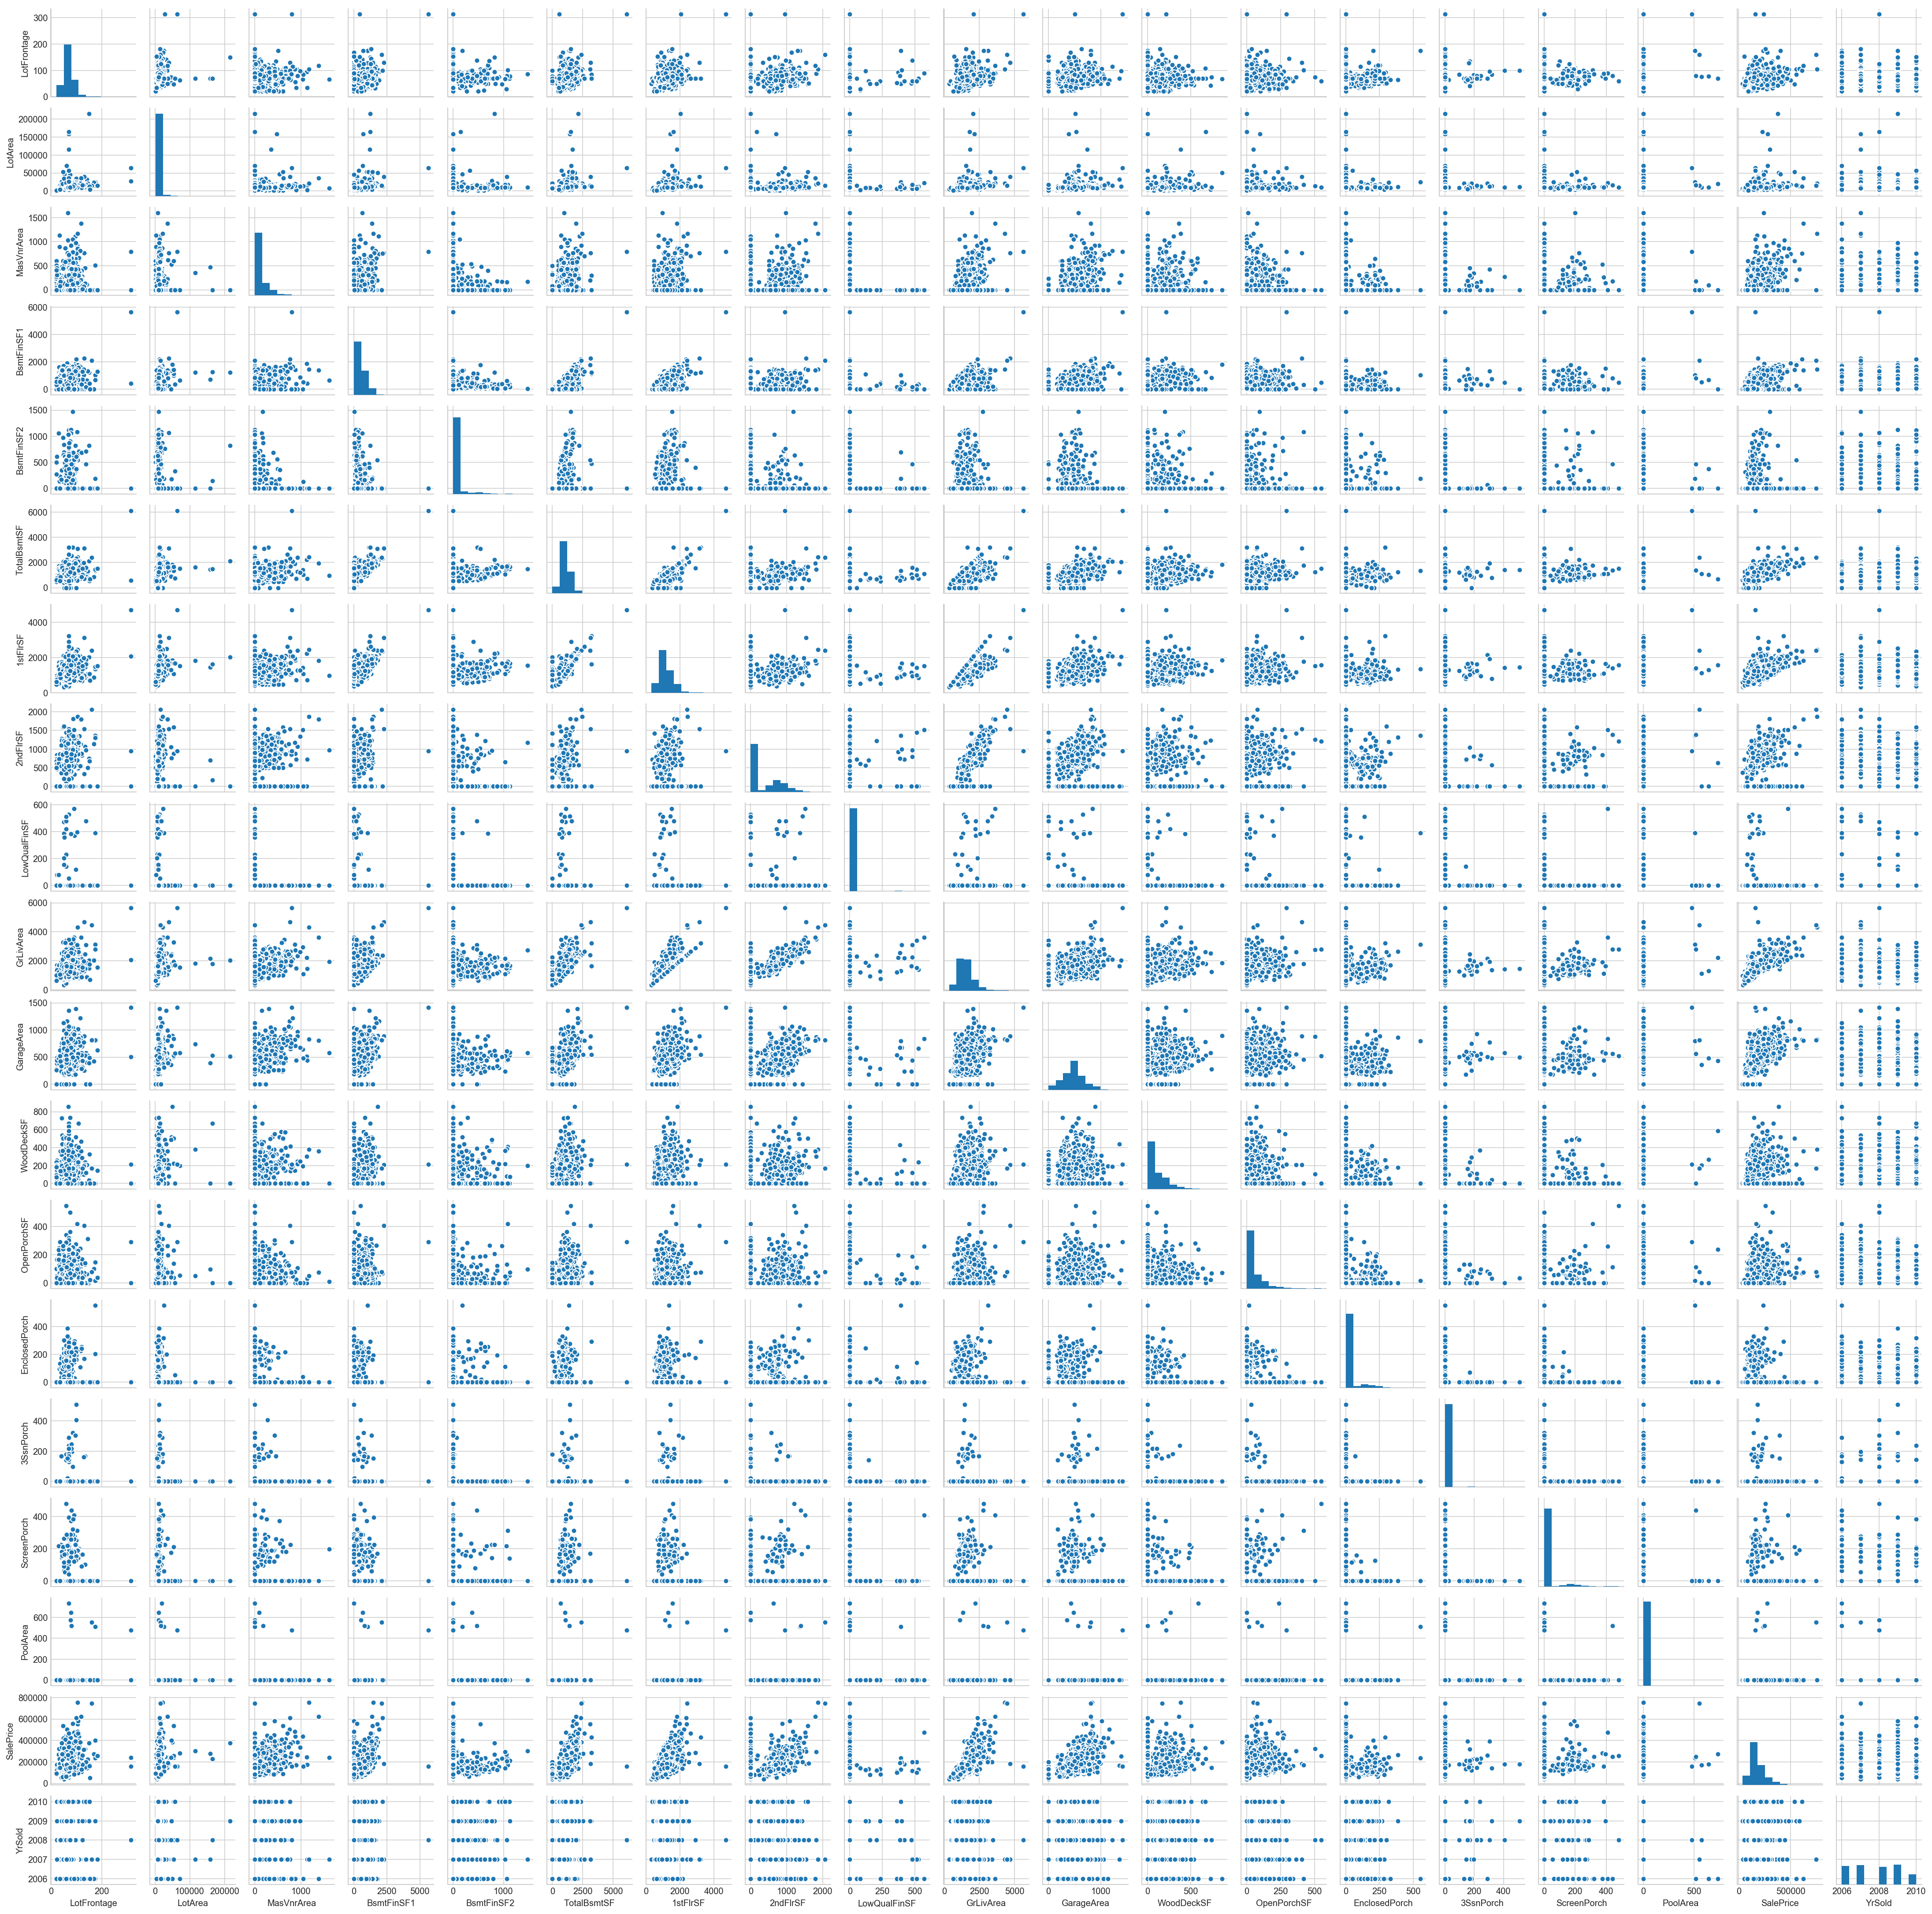

In [19]:
import seaborn as sns

g = sns.pairplot(house_num)
g.fig.set_size_inches(30,30)

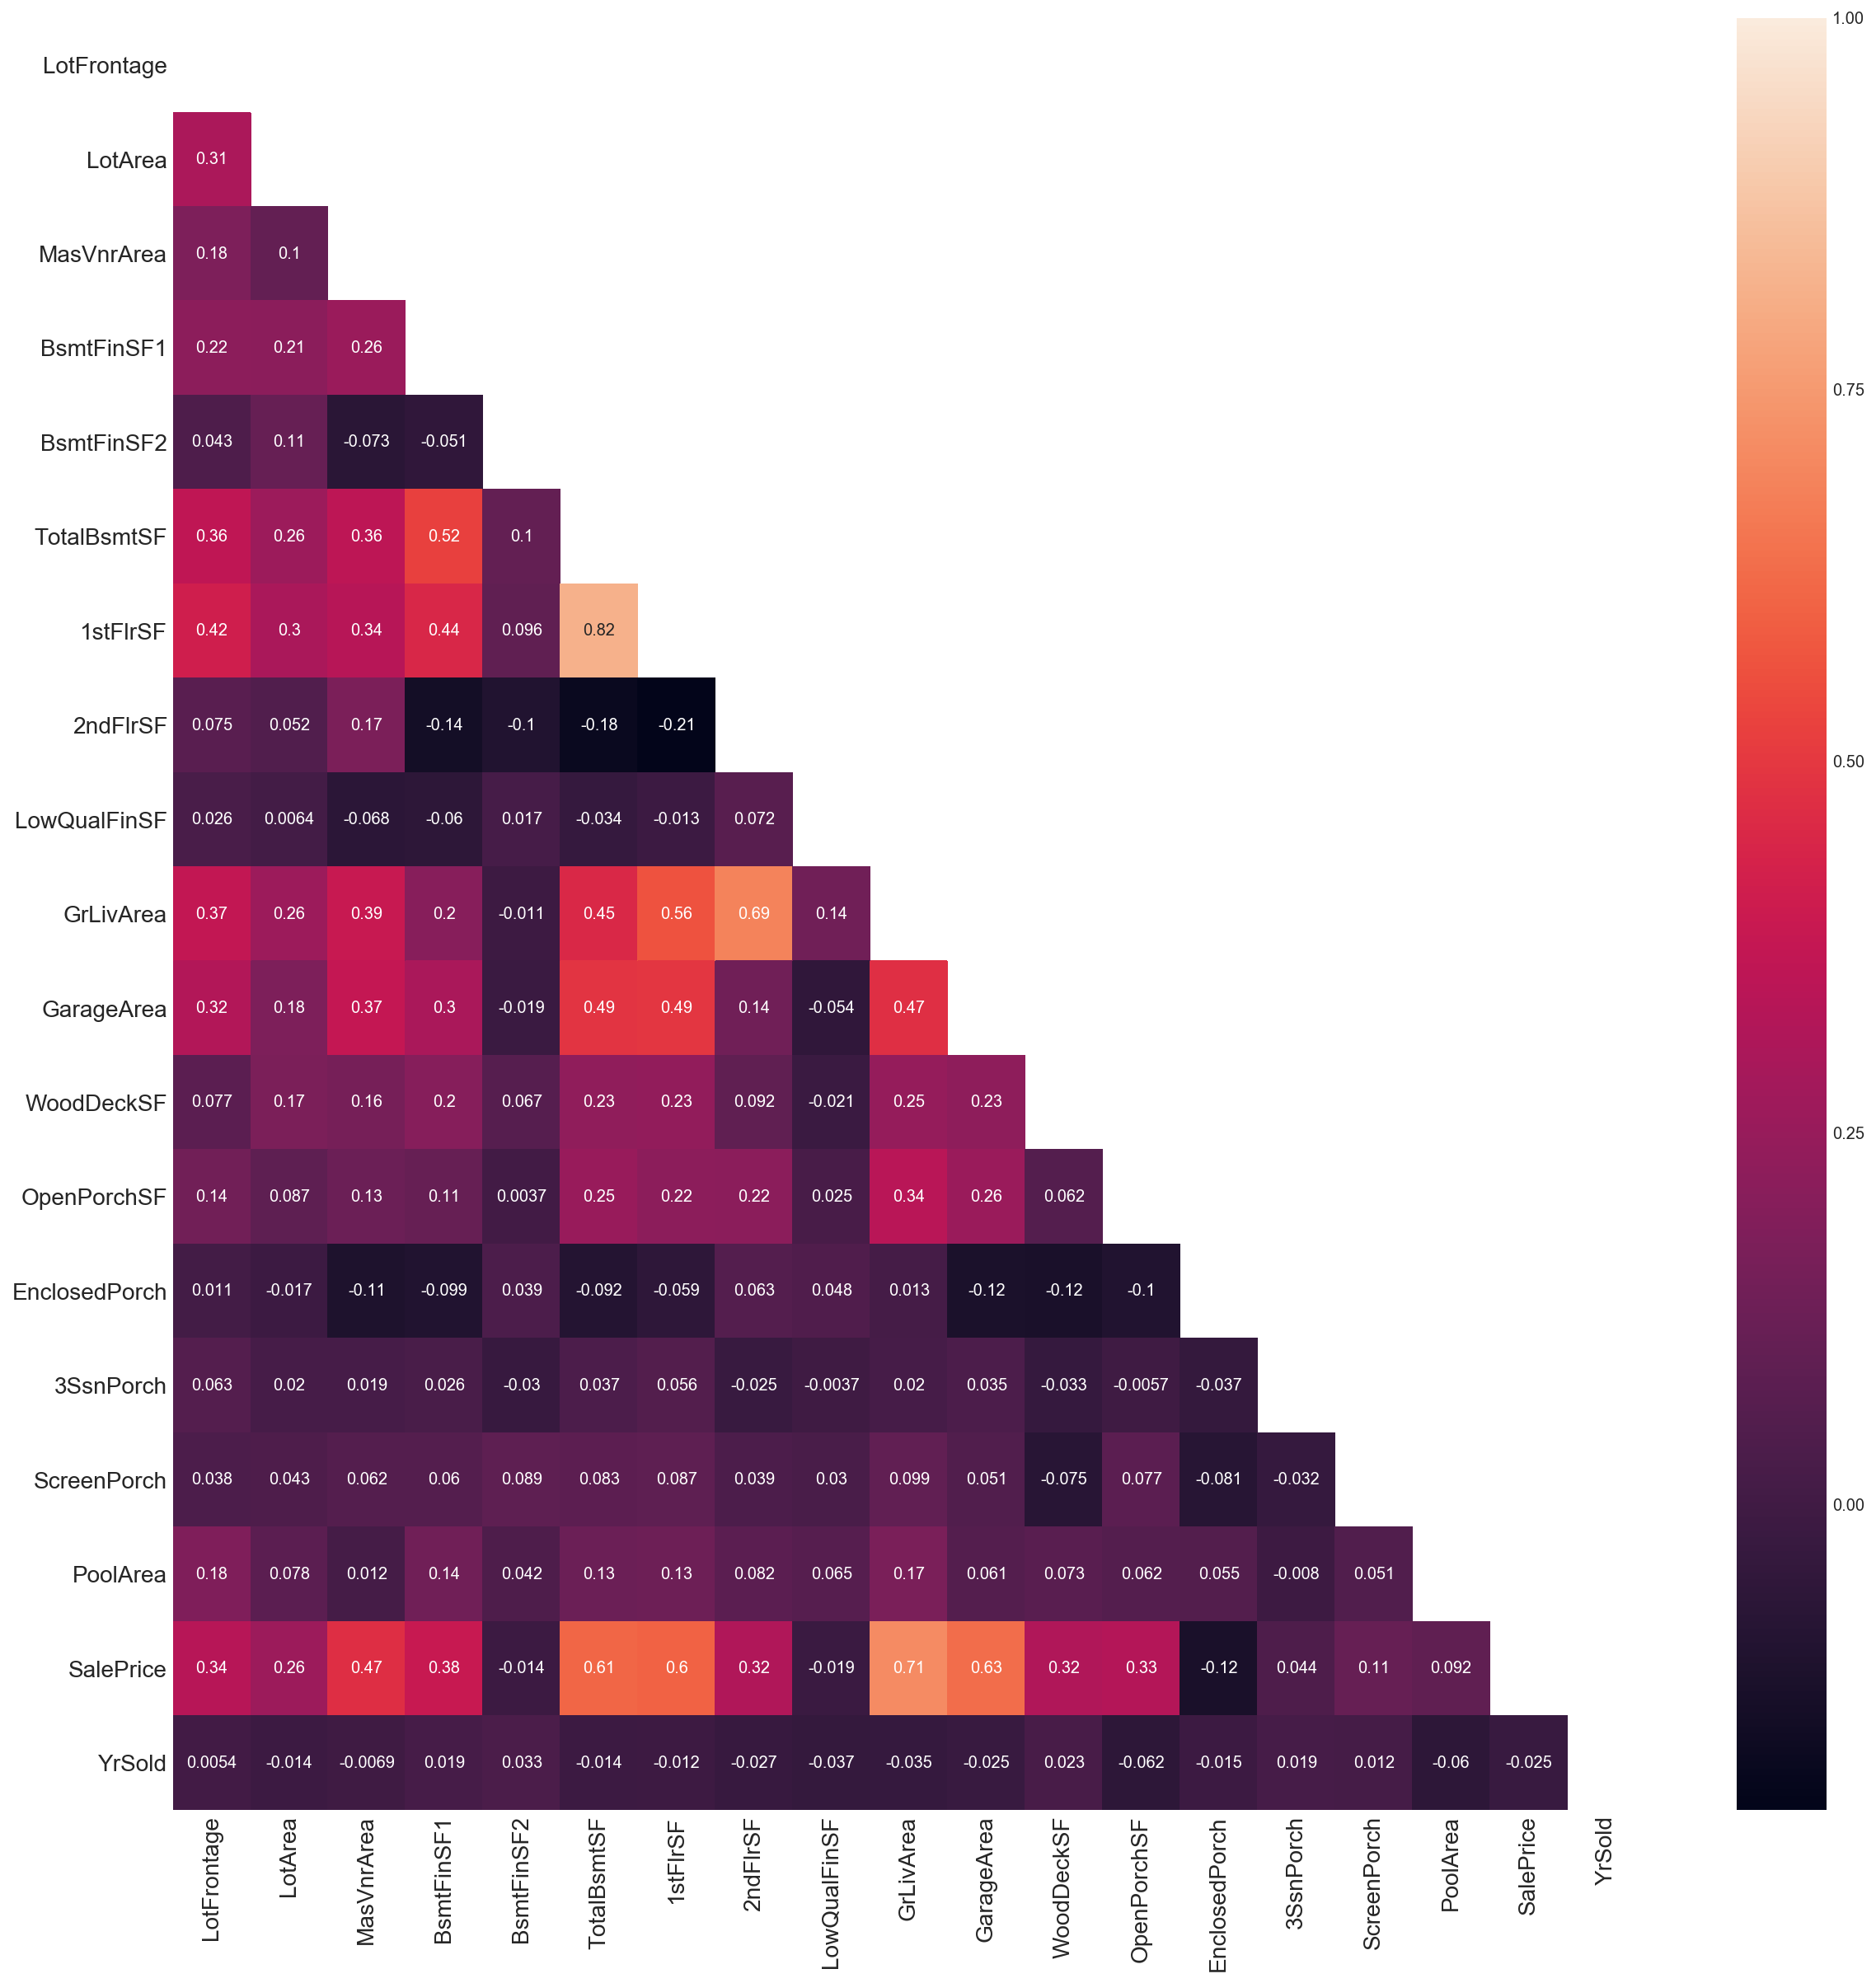

In [20]:
import seaborn as sns

corrs = house_num.corr()

fig, ax = plt.subplots(1,1,figsize = (20,20))

mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corrs, mask=mask, annot=True)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

#### Discovery:
'GrLivArea' has strong correlation with '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', and 'GarageArea' (correlation value of 0.47 and greater).

This makes sense, since the larger the living area, the larger will be the floor areas of the basement, first and second floors, and the garage area.

Hence, '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', and 'GarageArea' will be dropped from the list of predictors to simplify our linear model.

This leaves us with 13 continuous features (excluding SalePrice & YrSold).

In [21]:
# Dropping the '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', and 'GarageArea' columns from house_num

house_num.drop(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GarageArea'], axis=1, inplace = True)

C:\Users\dsiow\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Histograms of house_num

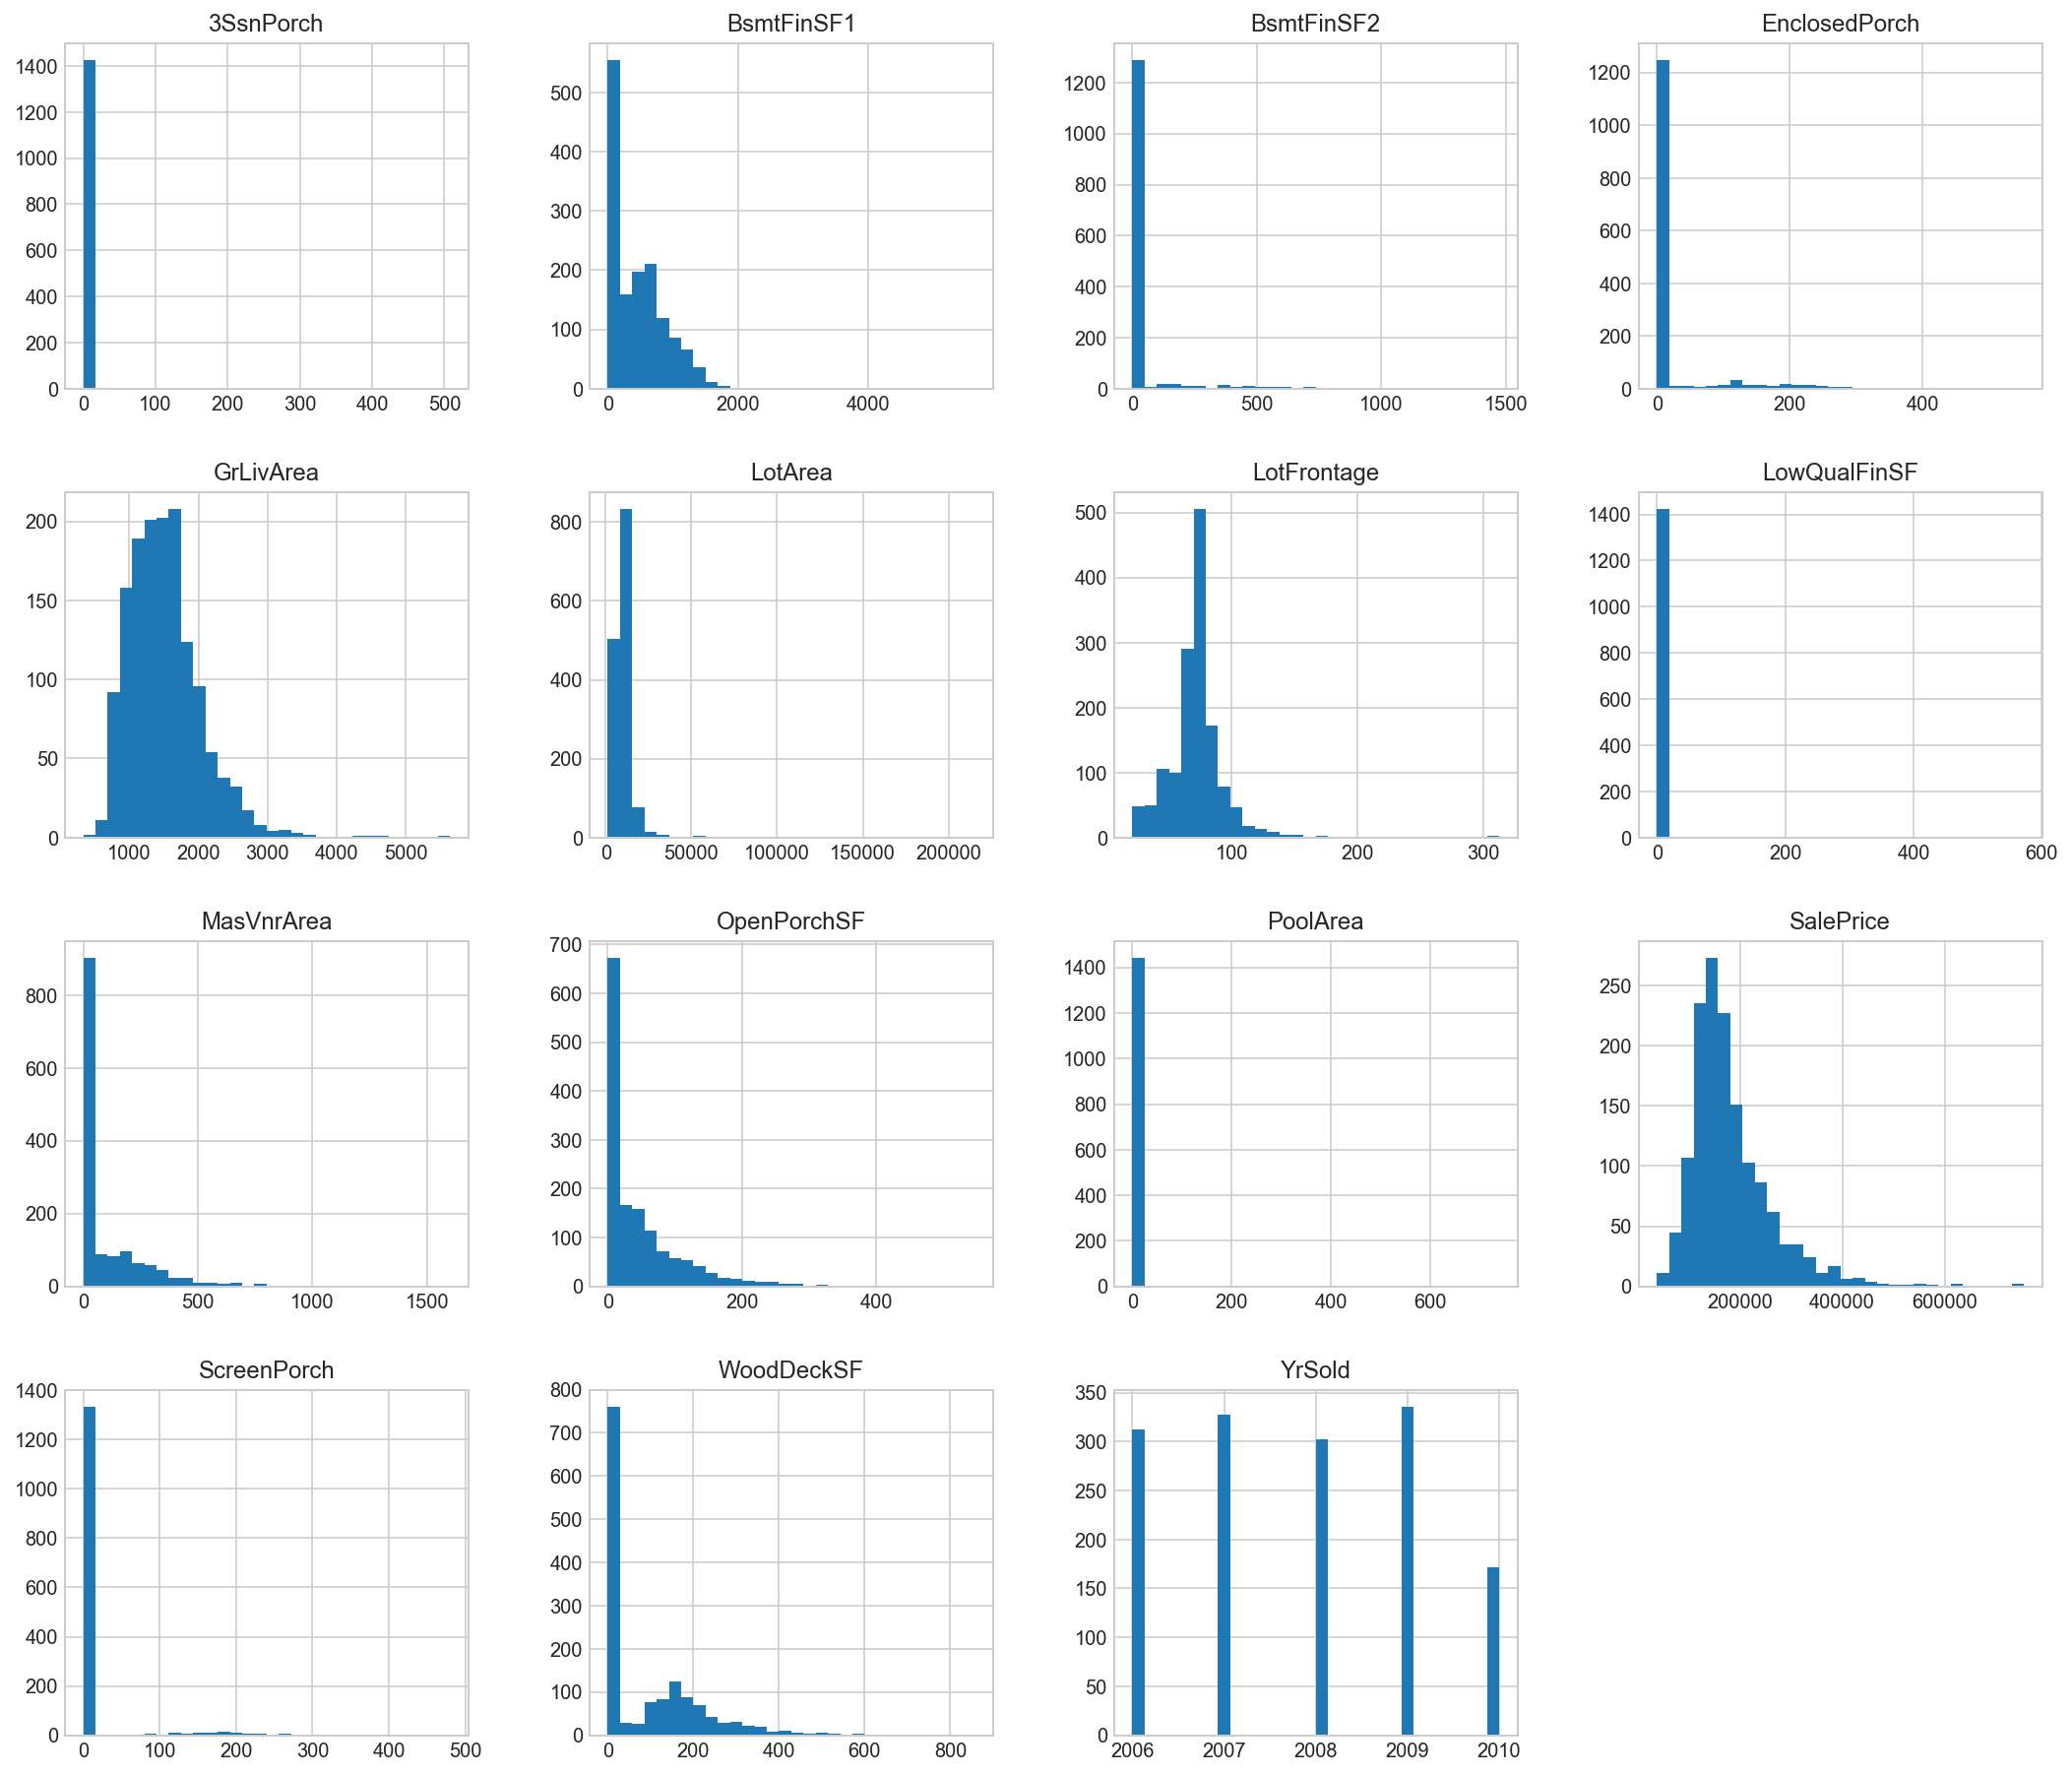

In [119]:
# Histograms of house_num

house_num.hist(figsize = (18, 20), layout=(5,4), bins = 30)

plt.show()

In [23]:
house_num.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1450.000000    1450.000000  1450.000000  1450.000000  1450.000000   
mean     70.043448   10523.831724   103.828276   445.162759    46.870345   
std      22.022359   10012.185355   181.150114   456.353871   161.828458   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7544.500000     0.000000     0.000000     0.000000   
50%      70.000000    9496.000000     0.000000   384.000000     0.000000   
75%      79.000000   11613.500000   166.000000   713.750000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

       LowQualFinSF    GrLivArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count   1450.000000  1450.000000  1450.000000  1450.000000    1450.000000   
mean       5.531034  1517.698621    94.826897    46.537931      21.536552   
std       46.932966   525.154207   125.560863    65.222761      60.838826   
min        0.000000   334.000000     0.000000     0.000000       0.000000   
25%        0.000000  1131.250000     0.000000     0.000000       0.000000   
50%        0.000000  1466.000000     0.000000    25.000000       0.000000   
75%        0.000000  1779.000000   168.000000    68.000000       0.000000   
max      572.000000  5642.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea      SalePrice       YrSold  
count  1450.000000  1450.000000  1450.000000    1450.000000  1450.000000  
mean      3.433103    15.096552     2.777931  181654.942069  2007.812414  
std      29.416948    55.893399    40.315051   79176.485241     1.326321  
min       0.000000     0.000000     0.000000   37900.000000  2006.000000  
25%       0.000000     0.000000     0.000000  130000.000000  2007.000000  
50%       0.000000     0.000000     0.000000  163945.000000  2008.000000  
75%       0.000000     0.000000     0.000000  214000.000000  2009.000000  
max     508.000000   480.000000   738.000000  755000.000000  2010.000000

## Applying transformation on house_num

From the histograms above, we can observe that some features in house_train_num are positively skewed.

The following features will undergo transformation so that they will be less skewed:

1. 3SsnPorch - cube root transformation
2. BsmtFinSF1 - cube root transformation
3. BsmtFinSF2 - cube root transformation
4. EnclosedPorch - cube root transformation
5. GrLivArea - logarithm transformation
6. LotArea - logarithm transformation
7. LowQualFinSF - cube root transformation
8. MasVnrArea - cube root transformation
9. OpenPorchSF - cube root transformation
10. PoolArea - cube root transformation
11. ScreenPorch - cube root transformation
12. WoodDeckSF - cube root transformation

Only LotFrontage is not transformed since the distribution is roughly symmetrical.

Sources on application of transformation on skewed distributions:

https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55
http://rcompanion.org/handbook/I_12.html

In [24]:
temp_df_cube = house_num[['3SsnPorch','BsmtFinSF1','BsmtFinSF2','EnclosedPorch','LowQualFinSF','MasVnrArea',
                               'OpenPorchSF','PoolArea','ScreenPorch','WoodDeckSF']]

temp_df_log = house_num[['GrLivArea','LotArea']]


In [25]:
# Applying the transformation - cube

temp_df_cube = temp_df_cube.apply(lambda x: x**(1/3))

In [26]:
# Applying the transformation - log

temp_df_log = temp_df_log.apply(np.log)

## Standardizing the features (Feature Scaling)

In [27]:
# Using StandardScaler to scale temp_df_cube, temp_df_log, and house_train_num['LotFrontage']

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

temp_df_cube_std = pd.DataFrame(ss.fit_transform(temp_df_cube), columns=temp_df_cube.columns)
temp_df_log_std = pd.DataFrame(ss.fit_transform(temp_df_log), columns=temp_df_log.columns)
LotFrontage_std = pd.DataFrame(ss.fit_transform(house_num[['LotFrontage']]), columns =['LotFrontage'])

## Concatenating the dataframes - house_num_clean

In [29]:
# Combining temp_df_cube, temp_df_log, LotFrontage_std, house_num[['SalePrice','YrSold']] and the pandas series created to track imputation

house_num_clean = pd.concat([temp_df_cube_std, temp_df_log_std, LotFrontage_std, house_num[['SalePrice','YrSold']], 
                             impute_MasVnrArea, impute_LotFrontage], axis = 1)


In [30]:
house_num_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 17 columns):
3SsnPorch             1450 non-null float64
BsmtFinSF1            1450 non-null float64
BsmtFinSF2            1450 non-null float64
EnclosedPorch         1450 non-null float64
LowQualFinSF          1450 non-null float64
MasVnrArea            1450 non-null float64
OpenPorchSF           1450 non-null float64
PoolArea              1450 non-null float64
ScreenPorch           1450 non-null float64
WoodDeckSF            1450 non-null float64
GrLivArea             1450 non-null float64
LotArea               1450 non-null float64
LotFrontage           1450 non-null float64
SalePrice             1450 non-null int64
YrSold                1450 non-null int64
impute_MasVnrArea     1450 non-null int64
impute_LotFrontage    1450 non-null int64
dtypes: float64(13), int64(4)
memory usage: 192.7 KB


In [31]:
house_num_clean

3SsnPorch  BsmtFinSF1  BsmtFinSF2  EnclosedPorch  LowQualFinSF  \
0     -0.127889    0.786406   -0.348251      -0.394639     -0.129558   
1     -0.127889    1.031270   -0.348251      -0.394639     -0.129558   
2     -0.127889    0.536671   -0.348251      -0.394639     -0.129558   
3     -0.127889    0.090402   -0.348251       3.134566     -0.129558   
4     -0.127889    0.733734   -0.348251      -0.394639     -0.129558   
5      9.042495    0.812285   -0.348251      -0.394639     -0.129558   
6     -0.127889    1.313468   -0.348251      -0.394639     -0.129558   
7     -0.127889    0.930590    1.026186       2.932969     -0.129558   
8     -0.127889   -1.347456   -0.348251       2.817087     -0.129558   
9     -0.127889    0.923496   -0.348251      -0.394639     -0.129558   
10    -0.127889    0.971402   -0.348251      -0.394639     -0.129558   
11    -0.127889    1.047375   -0.348251      -0.394639     -0.129558   
12    -0.127889    0.817192   -0.348251      -0.394639     -0.129558   
13    -0.127889   -1.347456   -0.348251      -0.394639     -0.129558   
14    -0.127889    0.813268   -0.348251       2.657878     -0.129558   
15    -0.127889   -1.347456   -0.348251      -0.394639     -0.129558   
16    -0.127889    0.648759   -0.348251      -0.394639     -0.129558   
17    -0.127889   -1.347456   -0.348251      -0.394639     -0.129558   
18    -0.127889    0.724158   -0.348251      -0.394639     -0.129558   
19    -0.127889    0.559650   -0.348251      -0.394639     -0.129558   
20    -0.127889   -1.347456   -0.348251      -0.394639     -0.129558   
21    -0.127889   -1.347456   -0.348251       2.817087     -0.129558   
22    -0.127889   -1.347456   -0.348251      -0.394639     -0.129558   
23    -0.127889    0.913669   -0.348251      -0.394639     -0.129558   
24    -0.127889    0.025376    3.436179      -0.394639     -0.129558   
25    -0.127889   -1.347456   -0.348251      -0.394639     -0.129558   
26    -0.127889    0.129282    3.055469      -0.394639     -0.129558   
27    -0.127889    1.211800   -0.348251      -0.394639     -0.129558   
28    -0.127889    1.252474   -0.348251      -0.394639     -0.129558   
29    -0.127889   -1.347456   -0.348251       2.018934     -0.129558   
30    -0.127889   -1.347456   -0.348251      -0.394639     -0.129558   
31    -0.127889   -1.347456   -0.348251      -0.394639     -0.129558   
32    -0.127889    1.063267   -0.348251      -0.394639     -0.129558   
33    -0.127889    1.165440   -0.348251      -0.394639     -0.129558   
34    -0.127889   -1.347456   -0.348251      -0.394639     -0.129558   
35    -0.127889   -1.347456   -0.348251      -0.394639     -0.129558   
36    -0.127889    1.208294   -0.348251      -0.394639     -0.129558   
37    -0.127889    0.811301   -0.348251      -0.394639     -0.129558   
38    -0.127889   -1.347456   -0.348251      -0.394639     -0.129558   
39    -0.127889    0.720947   -0.348251      -0.394639     -0.129558   
40    -0.127889    1.022318   -0.348251      -0.394639     -0.129558   
41    -0.127889    0.826938    1.613163      -0.394639     -0.129558   
42    -0.127889    0.220320    3.067101      -0.394639     -0.129558   
43    -0.127889    0.003110    3.101533      -0.394639     -0.129558   
44    -0.127889    0.497077   -0.348251      -0.394639     -0.129558   
45    -0.127889    1.301755   -0.348251      -0.394639     -0.129558   
46    -0.127889   -0.656206   -0.348251      -0.394639     -0.129558   
47    -0.127889   -1.347456   -0.348251       2.150358     -0.129558   
48    -0.127889    0.842353   -0.348251      -0.394639     -0.129558   
49    -0.127889    0.010613   -0.348251      -0.394639     -0.129558   
...         ...         ...         ...            ...           ...   
1400  -0.127889    0.745320   -0.348251      -0.394639     -0.129558   
1401  -0.127889   -0.165435   -0.348251      -0.394639     -0.129558   
1402  -0.127889   -1.347456   -0.348251      -0.394639     -0.129558   
1403  -0.127889    1.029647   -0.348251      -

# house_obj

In [32]:
house_obj

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
0            60       RL   Pave   NaN      Reg         Lvl    AllPub   
1            20       RL   Pave   NaN      Reg         Lvl    AllPub   
2            60       RL   Pave   NaN      IR1         Lvl    AllPub   
3            70       RL   Pave   NaN      IR1         Lvl    AllPub   
4            60       RL   Pave   NaN      IR1         Lvl    AllPub   
5            50       RL   Pave   NaN      IR1         Lvl    AllPub   
6            20       RL   Pave   NaN      Reg         Lvl    AllPub   
7            60       RL   Pave   NaN      IR1         Lvl    AllPub   
8            50       RM   Pave   NaN      Reg         Lvl    AllPub   
9           190       RL   Pave   NaN      Reg         Lvl    AllPub   
10           20       RL   Pave   NaN      Reg         Lvl    AllPub   
11           60       RL   Pave   NaN      IR1         Lvl    AllPub   
12           20       RL   Pave   NaN      IR2         Lvl    AllPub   
13           20       RL   Pave   NaN      IR1         Lvl    AllPub   
14           20       RL   Pave   NaN      IR1         Lvl    AllPub   
15           45       RM   Pave   NaN      Reg         Lvl    AllPub   
16           20       RL   Pave   NaN      IR1         Lvl    AllPub   
17           90       RL   Pave   NaN      Reg         Lvl    AllPub   
18           20       RL   Pave   NaN      Reg         Lvl    AllPub   
19           20       RL   Pave   NaN      Reg         Lvl    AllPub   
20           60       RL   Pave   NaN      IR1         Lvl    AllPub   
21           45       RM   Pave  Grvl      Reg         Bnk    AllPub   
22           20       RL   Pave   NaN      Reg         Lvl    AllPub   
23          120       RM   Pave   NaN      Reg         Lvl    AllPub   
24           20       RL   Pave   NaN      IR1         Lvl    AllPub   
25           20       RL   Pave   NaN      Reg         Lvl    AllPub   
26           20       RL   Pave   NaN      Reg         Lvl    AllPub   
27           20       RL   Pave   NaN      Reg         Lvl    AllPub   
28           20       RL   Pave   NaN      IR1         Lvl    AllPub   
29           30       RM   Pave   NaN      IR1         Lvl    AllPub   
30           20       RL   Pave   NaN      IR1         Lvl    AllPub   
31           20       RL   Pave   NaN      Reg         Lvl    AllPub   
32           20       RL   Pave   NaN      IR1         Lvl    AllPub   
33          120       RL   Pave   NaN      Reg         Lvl    AllPub   
34           60       RL   Pave   NaN      Reg         Lvl    AllPub   
35           20       RL   Pave   NaN      Reg         Lvl    AllPub   
36           20       RL   Pave   NaN      Reg         Lvl    AllPub   
37           20       RL   Pave   NaN      Reg         Lvl    AllPub   
38           90       RL   Pave   NaN      Reg         Lvl    AllPub   
39           20       RL   Pave   NaN      Reg         Lvl    AllPub   
40           20       RL   Pave   NaN      Reg         Lvl    AllPub   
41           85       RL   Pave   NaN      IR1         Lvl    AllPub   
42           20       RL   Pave   NaN      IR1         Lvl    AllPub   
43           20       RL   Pave   NaN      Reg         Lvl    AllPub   
44          120       RL   Pave   NaN      Reg         Lvl    AllPub   
45           50       RL   Pave   NaN      IR1         Lvl    AllPub   
46           20       FV   Pave   NaN      Reg         Lvl    AllPub   
47          190       RM   Pave   NaN      Reg         Lvl    AllPub   
48           20       RL   Pave   NaN      Reg         Lvl    AllPub   
49           60       RL   Pave   NaN      IR2         Lvl    AllPub   
...         ...      ...    ...   ...      ...         ...       ...   
1400         60       RL   Pave   NaN      Reg         Lvl    AllPub   
1401         50       RL   Pave   NaN      Reg         Lvl    AllPub   
1402         90       RL   Pave   NaN      Reg         Lvl    AllPub   
1403         20       RL   Pave   NaN      IR

In [33]:
house_obj.describe()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
count        1450     1450   1450    89     1450        1450      1450   
unique         15        4      2     2        4           4         2   
top            20       RL   Pave  Grvl      Reg         Lvl    AllPub   
freq          534     1151   1446    50      916        1305      1449   

       LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
count       1450      1450         1450       1450       1450     1450   
unique         5         3           25          9          8        5   
top       Inside       Gtl        NAmes       Norm       Norm     1Fam   
freq        1044      1375          225       1252       1436     1211   

       HouseStyle BsmtQual PavedDrive  
count        1450     1413       1450  
unique          8        4          3  
top        1Story       TA          Y  
freq          722      639       1335

In [34]:
# Checking which columns in house_obj have missing values

house_obj.isnull().sum()

# Only Alley and BsmtQual have missing values
# For Alley, missing values means 'no alley access'
# For BsmtQual, missing values means 'no basement present'

MSSubClass         0
MSZoning           0
Street             0
Alley           1361
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
BsmtQual          37
PavedDrive         0
dtype: int64

## Imputation of missing values for Alley and BsmtQual in house_obj

In [35]:
house_obj['Alley'].fillna(value = 'No_alley', inplace = True)
house_obj['BsmtQual'].fillna(value = 'No_basement', inplace = True)

C:\Users\dsiow\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [36]:
# Confirming that no NaN values remain in house_obj
house_obj.isnull().sum()

MSSubClass      0
MSZoning        0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
BsmtQual        0
PavedDrive      0
dtype: int64

## Barplots of house_obj

In [37]:
# Creating a function that produces bar graphs for categorical features

def bar_graph(*args):
    import math
    
    groups = []
    for col in args:
        groups.append(house_obj.groupby(col).size())
        
    no_of_rows = math.ceil(len(groups)/4)
    
    fig, ax = plt.subplots(no_of_rows,4,figsize = (16,4*no_of_rows))
    
    # Making the arrangement of the subplots neater
    fig.tight_layout()
    
    # Increase the vertical spacing between subplots so that the x-axis labels will not be covered by other plots
    fig.subplots_adjust(hspace=0.5)
    
    for index, group in enumerate(groups):   
        group.plot(kind = 'bar', ax = ax[index//4][index%4])

    plt.show()

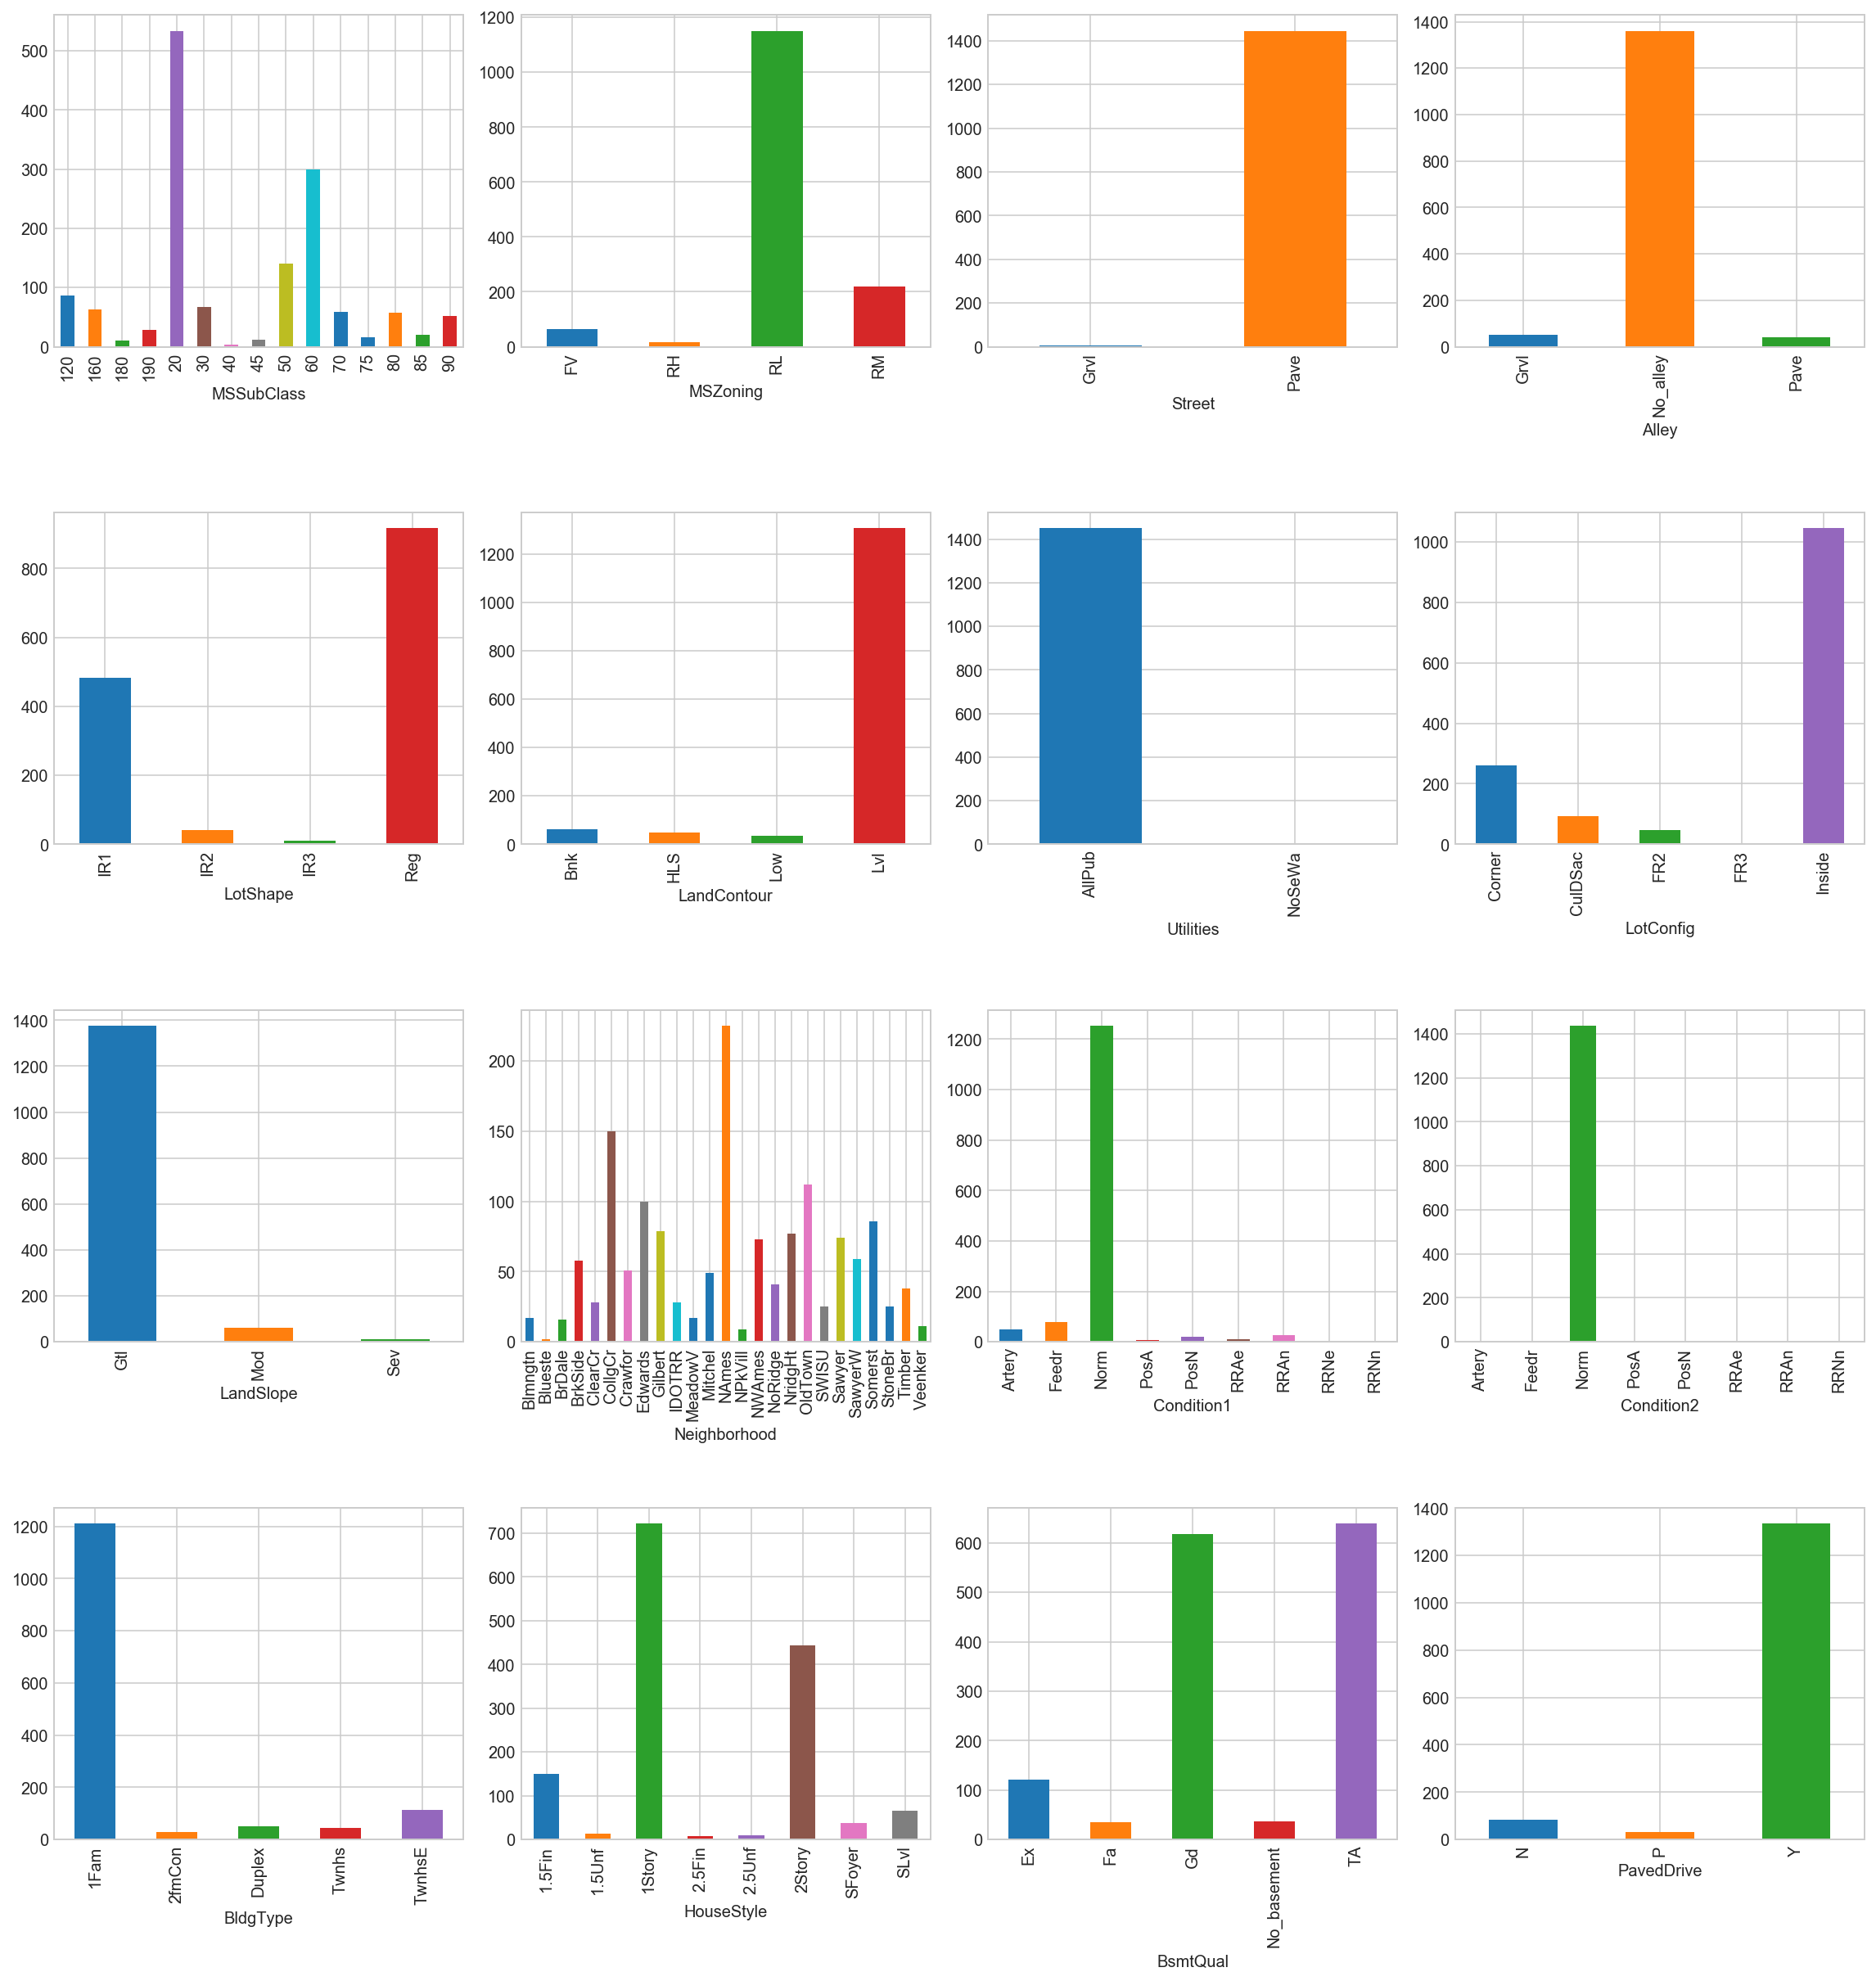

In [38]:
# Obtaining all the columns from house_train_obj
house_obj_col = house_obj.columns

# Passing in the list of column names into our bar_graph function
# Bar charts of house_train_obj
bar_graph(*house_obj_col)

In [39]:
house_obj.groupby('Street').size()

Street
Grvl       4
Pave    1446
dtype: int64

In [40]:
house_obj.groupby('Utilities').size()

Utilities
AllPub    1449
NoSeWa       1
dtype: int64

In [41]:
house_obj.groupby('Condition2').size()

Condition2
Artery       2
Feedr        5
Norm      1436
PosA         1
PosN         2
RRAe         1
RRAn         1
RRNn         2
dtype: int64

#### Discovery

'Street', 'Utilities', and 'Condition2' are mostly dominated by one category (>=99%).

They will be dropped to simplify our machine learning model.

In [42]:
# Dropping the 'Street', 'Utilities', and 'Condition2' columns from house_obj

house_obj.drop(['Street', 'Utilities', 'Condition2'], axis=1, inplace = True)

C:\Users\dsiow\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
house_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 13 columns):
MSSubClass      1450 non-null object
MSZoning        1450 non-null object
Alley           1450 non-null object
LotShape        1450 non-null object
LandContour     1450 non-null object
LotConfig       1450 non-null object
LandSlope       1450 non-null object
Neighborhood    1450 non-null object
Condition1      1450 non-null object
BldgType        1450 non-null object
HouseStyle      1450 non-null object
BsmtQual        1450 non-null object
PavedDrive      1450 non-null object
dtypes: object(13)
memory usage: 147.3+ KB


## Dummy-coding house_obj

In [44]:
# Obtain a list of columns that you want to dummy-code

col_list = house_obj.columns.tolist()

print(col_list)

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'BsmtQual', 'PavedDrive']


In [45]:
house_obj_dummy = pd.DataFrame()

for col in col_list:
    # Dummy-coding each column, then dropping the first column
    temp = pd.get_dummies(house_obj[col], prefix = col, drop_first=True)
    
    # Concatenating the dummy columns together
    house_obj_dummy = pd.concat([house_obj_dummy, temp], axis = 1)

In [46]:
house_obj_dummy

MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0                  0               0               0              0   
1                  0               0               0              1   
2                  0               0               0              0   
3                  0               0               0              0   
4                  0               0               0              0   
5                  0               0               0              0   
6                  0               0               0              1   
7                  0               0               0              0   
8                  0               0               0              0   
9                  0               0               1              0   
10                 0               0               0              1   
11                 0               0               0              0   
12                 0               0               0              1   
13                 0               0               0              1   
14                 0               0               0              1   
15                 0               0               0              0   
16                 0               0               0              1   
17                 0               0               0              0   
18                 0               0               0              1   
19                 0               0               0              1   
20                 0               0               0              0   
21                 0               0               0              0   
22                 0               0               0              1   
23                 0               0               0              0   
24                 0               0               0              1   
25                 0               0               0              1   
26                 0               0               0              1   
27                 0               0               0              1   
28                 0               0               0              1   
29                 0               0               0              0   
30                 0               0               0              1   
31                 0               0               0              1   
32                 0               0               0              1   
33                 0               0               0              0   
34                 0               0               0              0   
35                 0               0               0              1   
36                 0               0               0              1   
37                 0               0               0              1   
38                 0               0               0              0   
39                 0               0               0              1   
40                 0               0               0              1   
41                 0               0               0              0   
42                 0               0               0              1   
43                 0               0               0              1   
44                 0               0               0              0   
45                 0               0               0              0   
46                 0               0               0              1   
47                 0               0               1              0   
48                 0               0               0              1   
49                 0               0               0              0   
...              ...             ...             ...            ...   
1400               0               0               0              0   
1401               0               0               0              0   
1402               0               0               0              0   
1403               0               0               0              1   
1404               0          

## Concatenating house_num_clean and house_obj_dummy to get X and y

In [47]:
X = pd.concat([house_num_clean, house_obj_dummy], axis=1)
y = X[['SalePrice', 'YrSold']]

X_train = X.loc[X[X['YrSold'] < 2010].index,:]
X_test = X.loc[X[X['YrSold'] == 2010].index,:]

y_train = y.loc[y[y['YrSold'] < 2010].index,:]
y_test = y.loc[y[y['YrSold'] == 2010].index,:]

X_train.drop(labels = ['SalePrice','YrSold'], axis = 1, inplace = True)
X_test.drop(labels = ['SalePrice','YrSold'], axis = 1, inplace = True)

y_train.drop(labels = ['YrSold'], axis = 1, inplace = True)
y_test.drop(labels = ['YrSold'], axis = 1, inplace = True)

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278 entries, 0 to 1449
Data columns (total 95 columns):
3SsnPorch               1278 non-null float64
BsmtFinSF1              1278 non-null float64
BsmtFinSF2              1278 non-null float64
EnclosedPorch           1278 non-null float64
LowQualFinSF            1278 non-null float64
MasVnrArea              1278 non-null float64
OpenPorchSF             1278 non-null float64
PoolArea                1278 non-null float64
ScreenPorch             1278 non-null float64
WoodDeckSF              1278 non-null float64
GrLivArea               1278 non-null float64
LotArea                 1278 non-null float64
LotFrontage             1278 non-null float64
impute_MasVnrArea       1278 non-null int64
impute_LotFrontage      1278 non-null int64
MSSubClass_160          1278 non-null uint8
MSSubClass_180          1278 non-null uint8
MSSubClass_190          1278 non-null uint8
MSSubClass_20           1278 non-null uint8
MSSubClass_30           1278 no

In [49]:
# Checking that there are no more null values
X_train.isnull().sum()

3SsnPorch               0
BsmtFinSF1              0
BsmtFinSF2              0
EnclosedPorch           0
LowQualFinSF            0
MasVnrArea              0
OpenPorchSF             0
PoolArea                0
ScreenPorch             0
WoodDeckSF              0
GrLivArea               0
LotArea                 0
LotFrontage             0
impute_MasVnrArea       0
impute_LotFrontage      0
MSSubClass_160          0
MSSubClass_180          0
MSSubClass_190          0
MSSubClass_20           0
MSSubClass_30           0
MSSubClass_40           0
MSSubClass_45           0
MSSubClass_50           0
MSSubClass_60           0
MSSubClass_70           0
MSSubClass_75           0
MSSubClass_80           0
MSSubClass_85           0
MSSubClass_90           0
MSZoning_RH             0
MSZoning_RL             0
MSZoning_RM             0
Alley_No_alley          0
Alley_Pave              0
LotShape_IR2            0
LotShape_IR3            0
LotShape_Reg            0
LandContour_HLS         0
LandContour_

# Training linear regression model

In [50]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
# Printing out the coefficients

for f, coeff in zip(X_train.columns,linear_model.coef_[0]):
    print(f,coeff)

3SsnPorch 1657.0498810801796
BsmtFinSF1 8309.14506993644
BsmtFinSF2 -487.9059277458073
EnclosedPorch -413.00433206173534
LowQualFinSF -2860.3958760086025
MasVnrArea 1521.4582359080523
OpenPorchSF 2108.9069897285844
PoolArea 2182.099292105888
ScreenPorch 2622.2931059238654
WoodDeckSF 3195.4011544168334
GrLivArea 33639.34323195196
LotArea 11041.239809649676
LotFrontage -1854.8254881185567
impute_MasVnrArea -2311.868964570561
impute_LotFrontage -448.0349583078796
MSSubClass_160 5225.99291941885
MSSubClass_180 18677.830837008445
MSSubClass_190 -26902.351391306333
MSSubClass_20 888.1330337144464
MSSubClass_30 -10610.362806347852
MSSubClass_40 -24390.46742371053
MSSubClass_45 12800.289310555832
MSSubClass_50 -6568.701584771675
MSSubClass_60 8961.769814847597
MSSubClass_70 8203.993089542795
MSSubClass_75 31315.882646484537
MSSubClass_80 -4269.978996408748
MSSubClass_85 -25658.41086387843
MSSubClass_90 -1.0556380078205236e+18
MSZoning_RH -14906.5109044575
MSZoning_RL -4298.800469518761
MSZonin

In [52]:
# Printing out the intercept
print(linear_model.intercept_)

[251469.78247261]


In [53]:
# Printing out the score on training set
print(linear_model.score(X_train, y_train))

0.8243307500934867


### Calculate RMSE on training set

In [54]:
# Predicting the SalePrice of training set

SalePrice_pred = linear_model.predict(X_train)

In [55]:
# Calculating RMSE:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, SalePrice_pred))

33138.13560445275

## Test linear regression model on test set

In [56]:
# Printing out the score on training set
print(linear_model.score(X_test, y_test))

0.8179906252272886


### Calculate RMSE on test set

In [57]:
# Predicting the SalePrice of test set

SalePrice_pred = linear_model.predict(X_test)

In [58]:
# Calculating RMSE:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,SalePrice_pred))

34016.26428301019

# Performing cross-validation

Performing cross-validation to see how well the linear model holds for different folds of the training data

In [59]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

# Perform cross-validation with a five-fold split.
scores = cross_val_score(linear_model, X_train, y_train, cv=10)

print(scores)
print(np.mean(scores), np.std(scores))

[ 8.70906872e-01  7.78420815e-01  8.38388726e-01 -1.67089853e+13
  7.99865183e-01 -1.30888605e+22  8.34014607e-01  7.57404557e-01
  7.03134276e-01  8.09092594e-01]
-1.3088860509142395e+21 3.926658147173057e+21


It appears that the model doesn't perform well for all segments of the training data. Thus, we'll proceed to use lasso linear regression to remove coefficients to improve our model.

# Lasso Linear Regression Modelling

## Getting optimum alpha value for lasso

In [60]:
from sklearn.linear_model import LassoCV

optimal_lasso = LassoCV(n_alphas=100, cv=10, verbose=1)
optimal_lasso.fit(X_train, np.ravel(y_train))

print(optimal_lasso.alpha_)

..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

83.84406468489914


..............................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


## Training the lasso linear regression model

In [61]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores), np.std(lasso_scores))

[0.86915692 0.79261564 0.8451536  0.78672045 0.79524807 0.75843437
 0.83686515 0.76722307 0.70733121 0.82829176]
0.7987040238968715 0.04539513730206422


## Testing the lasso linear regression model on the test set

In [62]:
optimal_lasso.score(X_test, y_test)

0.8178059244145028

In [63]:
for f, coeff in zip(X_train.columns,optimal_lasso.coef_):
    print(f,coeff)

3SsnPorch 1438.229540521302
BsmtFinSF1 8198.658784257641
BsmtFinSF2 -490.3454842358983
EnclosedPorch -1039.4090737006627
LowQualFinSF -2648.8788361948946
MasVnrArea 2552.1673230107854
OpenPorchSF 2107.5074238024667
PoolArea 1916.2991320941053
ScreenPorch 2474.715844130548
WoodDeckSF 3927.401953436086
GrLivArea 36334.72602855485
LotArea 9122.928043689955
LotFrontage -1199.20303284072
impute_MasVnrArea 0.0
impute_LotFrontage -1830.868013562053
MSSubClass_160 -7428.605487632941
MSSubClass_180 0.0
MSSubClass_190 -19300.809586260653
MSSubClass_20 8819.342412535769
MSSubClass_30 93.07041555587179
MSSubClass_40 -0.0
MSSubClass_45 7002.518681729706
MSSubClass_50 -14429.656926656227
MSSubClass_60 7726.082170213715
MSSubClass_70 -0.0
MSSubClass_75 -0.0
MSSubClass_80 0.0
MSSubClass_85 -0.0
MSSubClass_90 -18241.728351445847
MSZoning_RH -887.6199778880735
MSZoning_RL 1753.0276290777012
MSZoning_RM -0.0
Alley_No_alley 3864.9766451846467
Alley_Pave 0.0
LotShape_IR2 9221.326878681291
LotShape_IR3 -446

In [64]:
# These are the coefficients removed by lasso
lasso_coefs = pd.DataFrame(optimal_lasso.coef_.reshape(-1,1), index=X_train.columns, columns=['coef'])
lasso_coefs.loc[lasso_coefs[lasso_coefs['coef'] == 0].index,:]

coef
impute_MasVnrArea      0.0
MSSubClass_180         0.0
MSSubClass_40         -0.0
MSSubClass_70         -0.0
MSSubClass_75         -0.0
MSSubClass_80          0.0
MSSubClass_85         -0.0
MSZoning_RM           -0.0
Alley_Pave             0.0
LotShape_Reg          -0.0
LotConfig_FR3         -0.0
LandSlope_Sev         -0.0
Neighborhood_Blueste   0.0
Neighborhood_BrDale    0.0
Neighborhood_BrkSide   0.0
Neighborhood_NPkVill   0.0
Neighborhood_Timber    0.0
Condition1_PosA        0.0
Condition1_PosN       -0.0
Condition1_RRAn       -0.0
Condition1_RRNe       -0.0
Condition1_RRNn        0.0
BldgType_2fmCon       -0.0
BldgType_Twnhs        -0.0
BldgType_TwnhsE       -0.0
HouseStyle_1Story      0.0
HouseStyle_2.5Fin      0.0
PavedDrive_P          -0.0

## Examining the residuals

In [65]:
# Create a new column called 'SalePrice_pred' in y_test
y_test['SalePrice_pred'] = optimal_lasso.predict(X_test)

In [66]:
# Create a new column that contains the residuals (y_test['SalePrice_pred'] - y_test['SalePrice'])
y_test['residual'] = y_test['SalePrice_pred'] - y_test['SalePrice']

## Scatterplot of predicted SalePrice against actual SalePrice

Text(0,0.5,'Predicted Sale Price')

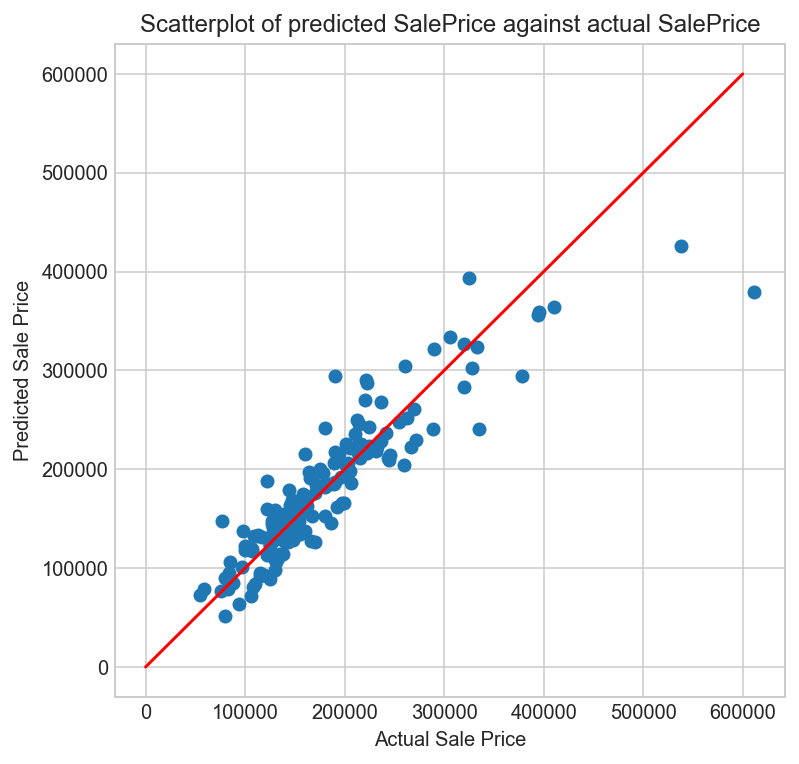

In [67]:
# Plotting predicted SalePrice against actual SalePrice
fig, ax = plt.subplots(1,1,figsize = (6,6))

ax.scatter(y_test['SalePrice'], y_test['SalePrice_pred'])
ax.plot([0,600000],[0,600000], color='red')

ax.set_title('Scatterplot of predicted SalePrice against actual SalePrice')
ax.set_xlabel('Actual Sale Price')
ax.set_ylabel('Predicted Sale Price')

The scatterplot features a very strong linear relationship between predicted price and actual price, showing that the lasso linear regression model is a good predictor. However, there are a few points that deviate from the diagonal red line, which implies that the model has its shortcomings.

## Scatterplot of residuals against actual SalePrice

C:\Users\dsiow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dsiow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


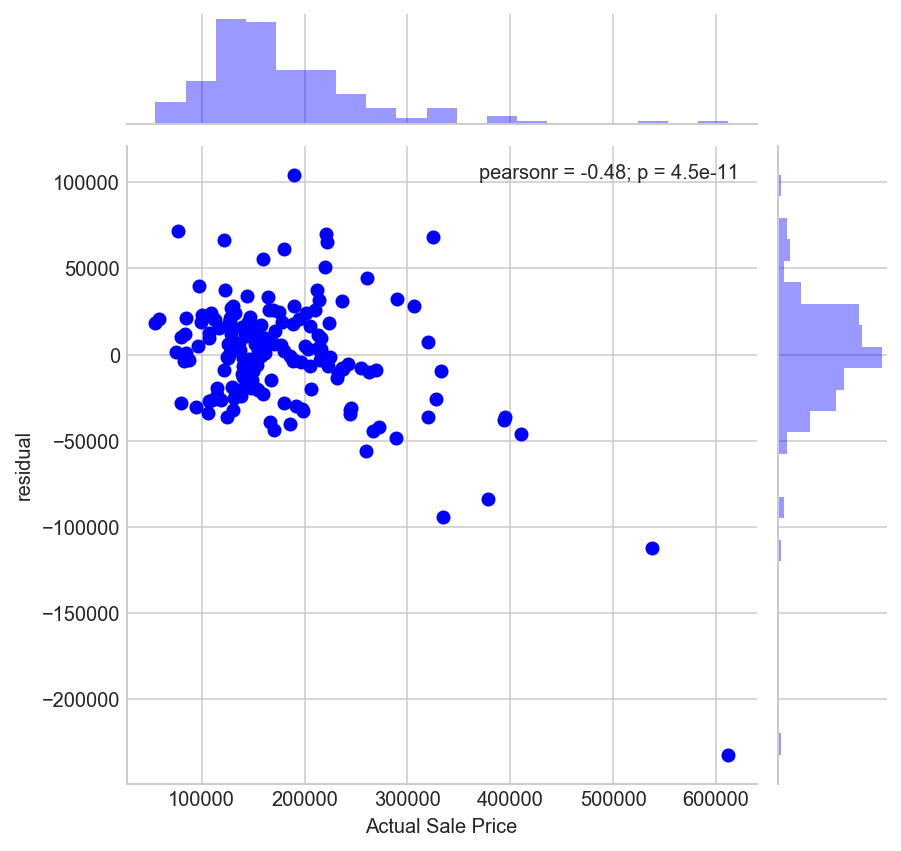

In [68]:
# Plotting predicted SalePrice against actual SalePrice
ax = sns.jointplot(y_test['SalePrice'], y_test['residual'], color = 'b')
ax.set_axis_labels('Actual Sale Price', 'residual', fontsize=10)
plt.show()

## Histogram of residuals

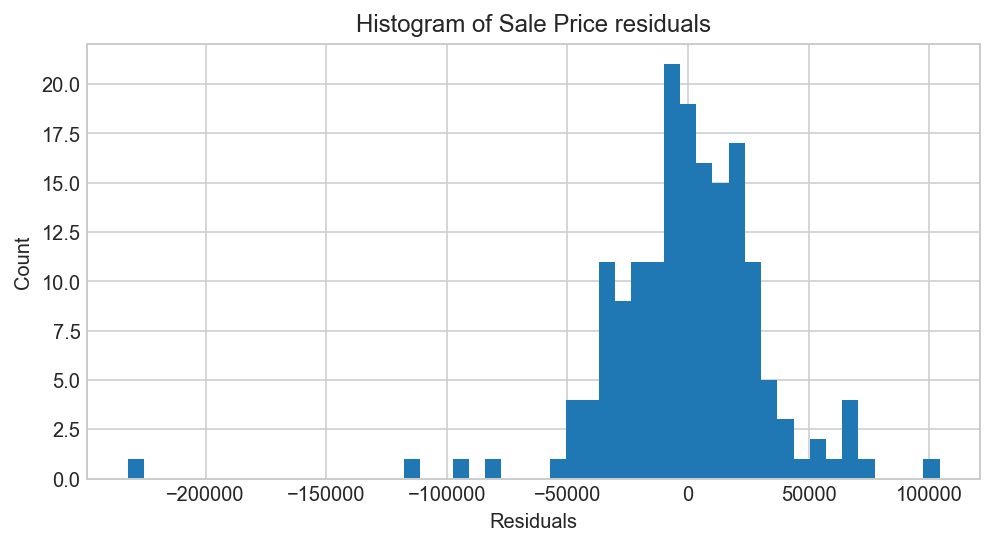

In [69]:
# Generating a histogram of residuals
fig, ax = plt.subplots(1,1,figsize = (8,4))

ax = y_test['residual'].hist(bins = 50)
ax.set_xlabel('Residuals')
ax.set_ylabel('Count')
ax.set_title('Histogram of Sale Price residuals')

plt.show()


The residuals are largely symmetrical about zero, save for a few outliers.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [109]:
# Load the data
house = pd.read_csv('./housing.csv')

In [110]:
# Dropping rows where houses are of non-residential type

house.drop(house[house['MSZoning'] == 'C (all)'].index, inplace=True)

In [111]:
# Resetting index

house.reset_index(drop = True, inplace = True)

# Feature Selection - Renovatable features

1. OverallQual: Overall material and finish quality
2. OverallCond: Overall condition rating
3. RoofStyle: Type of roof
4. RoofMatl: Roof material
5. Exterior1st: Exterior covering on house
6. Exterior2nd: Exterior covering on house (if more than one material)
7. MasVnrType: Masonry veneer type
8. ExterQual: Exterior material quality
9. ExterCond: Present condition of the material on the exterior
10. BsmtCond: General condition of the basement
11. BsmtExposure: Walkout or garden level basement walls
12. BsmtFinType1: Quality of basement finished area
13. BsmtFinType2: Quality of second finished area (if present)
14. BsmtUnfSF: Unfinished square feet of basement area
15. Heating: Type of heating
16. HeatingQC: Heating quality and condition
17. CentralAir: Central air conditioning
18. Electrical: Electrical system
19. BsmtFullBath: Basement full bathrooms
20. BsmtHalfBath: Basement half bathrooms
21. FullBath: Full bathrooms above grade
22. HalfBath: Half baths above grade
23. Bedroom: Number of bedrooms above basement level
24. Kitchen: Number of kitchens
25. KitchenQual: Kitchen quality
26. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
27. Functional: Home functionality rating
28. Fireplaces: Number of fireplaces
29. FireplaceQu: Fireplace quality
30. GarageType: Garage location
31. GarageFinish: Interior finish of the garage
32. GarageCars: Size of garage in car capacity
33. GarageQual: Garage quality
34. GarageCond: Garage condition
35. PoolQC: Pool quality
36. Fence: Fence quality
37. MiscFeature: Miscellaneous feature not covered in other categories
38. MiscVal: Dollar Value of miscellaneous feature


In [112]:
reno_features = ['OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
            'ExterCond','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtUnfSF','Heating','HeatingQC','CentralAir',
            'Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','KitchenQual','TotRmsAbvGrd',
            'Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond',
            'PoolQC','Fence','MiscFeature','MiscVal', 'YrSold']

In [113]:
reno_house = house[reno_features]
reno_house.shape

(1450, 37)

# Splitting reno_house dataframe into numerical df and objects df

In [114]:
# Subsetting out numerical columns in reno_house_train
reno_house_num = reno_house.loc[:, (reno_house.dtypes == np.float64) | (reno_house.dtypes == np.int64)]

In [115]:
# Subsetting out discrete columns in reno_house_train
reno_house_obj = reno_house.loc[:, (reno_house.dtypes == object)]

# reno_house_num

In [118]:
# Checking which columns in reno_house_num have missing values

reno_house_num.isnull().sum()

# No missing values in reno_house_num

OverallQual     0
OverallCond     0
BsmtUnfSF       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
MiscVal         0
YrSold          0
dtype: int64

In [124]:
reno_house_num.describe()

OverallQual  OverallCond    BsmtUnfSF  BsmtFullBath  BsmtHalfBath  \
count  1450.000000  1450.000000  1450.000000   1450.000000   1450.000000   
mean      6.114483     5.582069   567.375862      0.427586      0.057241   
std       1.372860     1.107330   442.584978      0.519394      0.238249   
min       1.000000     1.000000     0.000000      0.000000      0.000000   
25%       5.000000     5.000000   223.000000      0.000000      0.000000   
50%       6.000000     5.000000   475.000000      0.000000      0.000000   
75%       7.000000     6.000000   808.000000      1.000000      0.000000   
max      10.000000     9.000000  2336.000000      3.000000      2.000000   

          FullBath     HalfBath  TotRmsAbvGrd   Fireplaces   GarageCars  \
count  1450.000000  1450.000000   1450.000000  1450.000000  1450.000000   
mean      1.568966     0.384828      6.522069     0.616552     1.770345   
std       0.549549     0.503450      1.625324     0.644991     0.745136   
min       0.000000     0.000000      2.000000     0.000000     0.000000   
25%       1.000000     0.000000      5.000000     0.000000     1.000000   
50%       2.000000     0.000000      6.000000     1.000000     2.000000   
75%       2.000000     1.000000      7.000000     1.000000     2.000000   
max       3.000000     2.000000     14.000000     3.000000     4.000000   

            MiscVal       YrSold  
count   1450.000000  1450.000000  
mean      43.365517  2007.812414  
std      497.636495     1.326321  
min        0.000000  2006.000000  
25%        0.000000  2007.000000  
50%        0.000000  2008.000000  
75%        0.000000  2009.000000  
max    15500.000000  2010.000000

## Histograms of reno_house_num

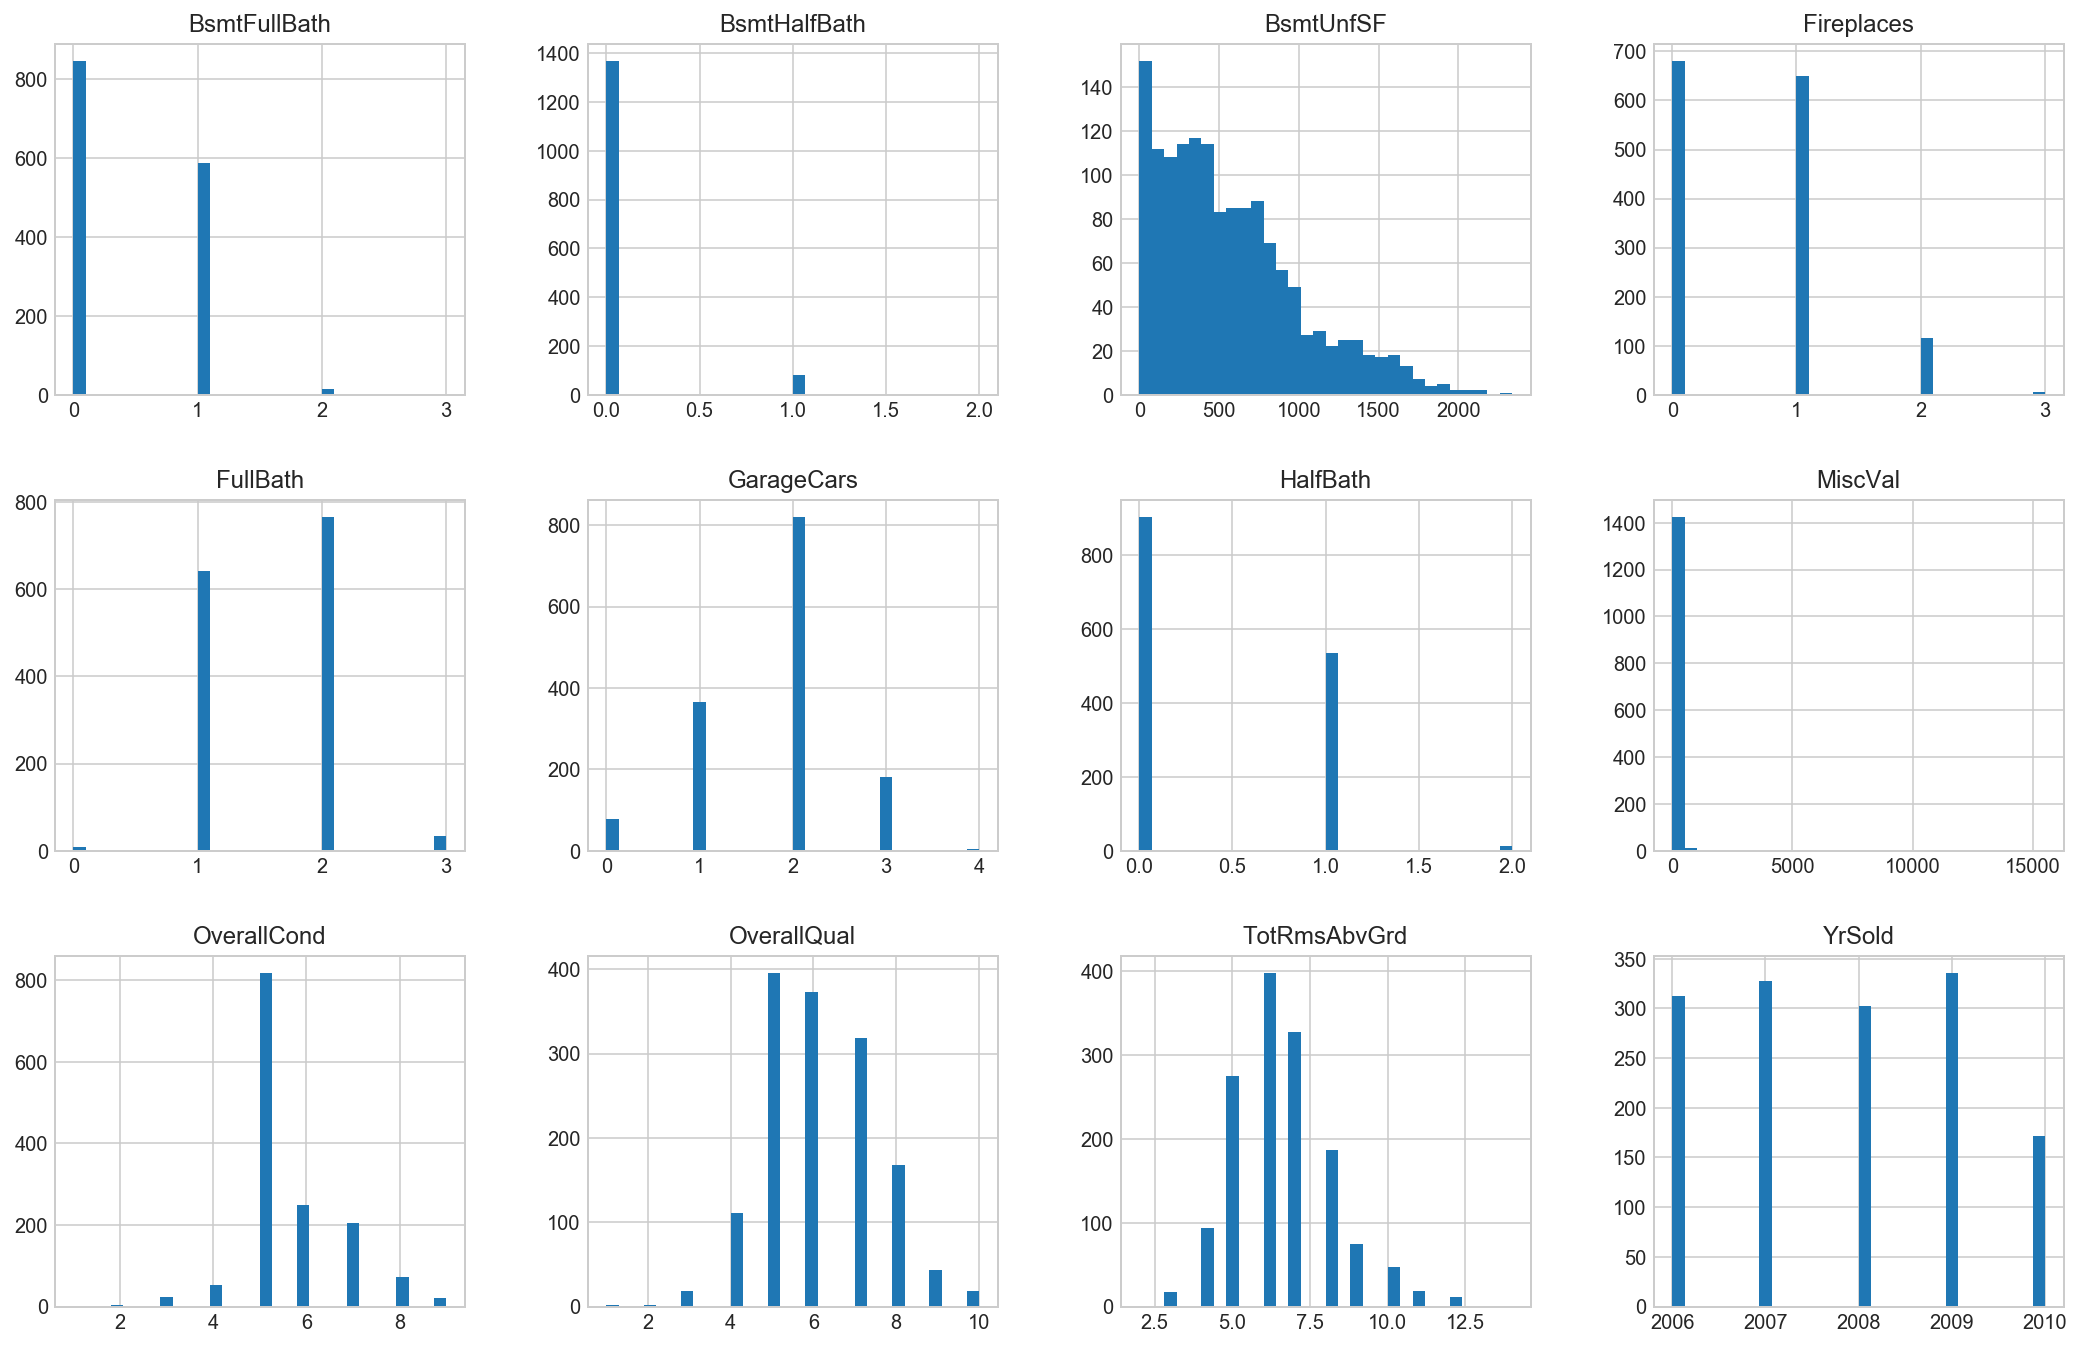

In [123]:
# Histograms of house_num

reno_house_num.hist(figsize = (18, 20), layout=(5,4), bins = 30)

plt.show()

## Applying transformation on house_num

From the histograms above, we can observe that some features in house_train_num are positively skewed.

The following features will undergo transformation so that they will be less skewed:

1. BsmtUnfSF - cube root transformation
2. BsmtFullBath - cube root transformation
3. BsmtHalfBath - cube root transformation
4. Fireplaces - cube root transformation
5. HalfBath - cube root transformation
6. MiscVal - cube root transformation

The rest are not transformed since the distribution is roughly symmetrical.

Sources on application of transformation on skewed distributions:

https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55
http://rcompanion.org/handbook/I_12.html

In [126]:
temp_reno_cube = reno_house_num[['BsmtUnfSF','BsmtFullBath','BsmtHalfBath','Fireplaces','HalfBath','MiscVal']]

In [127]:
# Applying the transformation - cube

temp_reno_cube = temp_reno_cube.apply(lambda x: x**(1/3))

## Standardizing the features (feature scaling)

In [132]:
# Using StandardScaler to scale temp_df_cube, and house_train_num['LotFrontage']

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

temp_reno_cube_std = pd.DataFrame(ss.fit_transform(temp_reno_cube), columns=temp_reno_cube.columns)
others_std = pd.DataFrame(ss.fit_transform(reno_house_num[['FullBath','GarageCars','OverallCond','OverallQual',
                                                            'TotRmsAbvGrd']]), 
                          columns =['FullBath','GarageCars','OverallCond','OverallQual','TotRmsAbvGrd'])

## Concatenating the dataframes - reno_house_num_clean

In [133]:
# Combining temp_reno_cube_std, others_std, reno_house_num[YrSold'] together

reno_house_num_clean = pd.concat([temp_reno_cube_std, others_std, house_num[['YrSold']]], axis = 1)

In [158]:
reno_house_num_clean

BsmtUnfSF  BsmtFullBath  BsmtHalfBath  Fireplaces  HalfBath   MiscVal  \
0     -0.704285      1.168750     -0.243037   -1.052748  1.273543 -0.177927   
1     -0.274973     -0.842369      4.079875    0.852732 -0.776270 -0.177927   
2      0.065123      1.168750     -0.243037    0.852732  1.273543 -0.177927   
3      0.260067      1.168750     -0.243037    0.852732 -0.776270 -0.177927   
4      0.171633      1.168750     -0.243037    0.852732  1.273543 -0.177927   
5     -1.151810      1.168750     -0.243037   -1.052748  1.273543  4.675239   
6     -0.191376      1.168750     -0.243037    0.852732 -0.776270 -0.177927   
7     -0.470279      1.168750     -0.243037    1.348006  1.273543  3.674034   
8      0.837363     -0.842369     -0.243037    1.348006 -0.776270 -0.177927   
9     -0.745449      1.168750     -0.243037    1.348006 -0.776270 -0.177927   
10    -0.771096      1.168750     -0.243037   -1.052748 -0.776270 -0.177927   
11    -0.601585      1.168750     -0.243037    1.348006 -0.776270 -0.177927   
12    -0.608819      1.168750     -0.243037   -1.052748 -0.776270 -0.177927   
13     1.380710     -0.842369     -0.243037    0.852732 -0.776270 -0.177927   
14     0.225377      1.168750     -0.243037    0.852732  1.273543 -0.177927   
15     0.690142     -0.842369     -0.243037   -1.052748 -0.776270 -0.177927   
16     0.049172      1.168750     -0.243037    0.852732 -0.776270  4.675239   
17    -2.514871     -0.842369     -0.243037   -1.052748 -0.776270  4.160335   
18     0.130809      1.168750     -0.243037   -1.052748  1.273543 -0.177927   
19     0.234132     -0.842369     -0.243037   -1.052748 -0.776270 -0.177927   
20     1.063551     -0.842369     -0.243037    0.852732  1.273543 -0.177927   
21     0.417160     -0.842369     -0.243037    0.852732 -0.776270 -0.177927   
22     1.612605     -0.842369     -0.243037    0.852732 -0.776270 -0.177927   
23    -0.522063      1.168750     -0.243037    0.852732 -0.776270 -0.177927   
24    -0.508865      1.168750     -0.243037    0.852732 -0.776270 -0.177927   
25     1.442311     -0.842369     -0.243037    0.852732 -0.776270 -0.177927   
26    -0.590836     -0.842369      4.079875   -1.052748 -0.776270 -0.177927   
27     0.164302      1.168750     -0.243037    0.852732 -0.776270 -0.177927   
28    -0.499080      1.168750     -0.243037    1.348006 -0.776270 -0.177927   
29     0.225377     -0.842369     -0.243037   -1.052748 -0.776270 -0.177927   
30     1.134249     -0.842369     -0.243037   -1.052748  1.273543 -0.177927   
31     1.140183     -0.842369     -0.243037   -1.052748 -0.776270 -0.177927   
32    -0.046654     -0.842369      4.079875    0.852732  1.273543 -0.177927   
33     0.012538      1.168750     -0.243037    0.852732 -0.776270 -0.177927   
34     1.020810     -0.842369     -0.243037    0.852732  1.273543 -0.177927   
35     0.999581     -0.842369     -0.243037   -1.052748  1.273543 -0.177927   
36    -1.022483     -0.842369      4.079875    0.852732 -0.776270 -0.177927   
37    -0.169592      1.168750     -0.243037   -1.052748 -0.776270 -0.177927   
38    -2.514871     -0.842369     -0.243037   -1.052748 -0.776270 -0.177927   
39     0.086738     -0.842369     -0.243037    0.852732 -0.776270 -0.177927   
40    -0.040176     -0.842369      4.079875    1.348006  1.273543 -0.177927   
41    -2.514871      1.168750     -0.243037   -1.052748 -0.776270 -0.177927   
42    -0.638318      1.168750     -0.243037   -1.052748 -0.776270 -0.177927   
43     0.125144      1.168750     -0.243037   -1.052748 -0.776270 -0.177927   
44     1.200399      1.168750     -0.243037    0.852732 -0.776270 -0.177927   
45    -1.028429      1.168750     -0.243037    0.852732  1.273543 -0.177927   
46     1.497140     -0.842369     -0.243037   -1.052748 -0.776270 -0.177927   
47     0.561802     -0.842369     -0.243037   -1.052748 -0.776270 -0.177927   
48    -0.548996      1.168750     -0.243037   -1.052748 -0.776270 -0.177927   
49     0.378290     -0.842369      4.079875   -1.052748 

# reno_house_obj

In [135]:
# Checking which columns in reno_house_obj have missing values

reno_house_obj.isnull().sum()

# For MasVnrType, missing values means 'no veneer'
# For BsmtCond, missing values means 'no basement present'
# For BsmtExposure, missing values means 'no basement present'
# For BsmtFinType1, missing values means 'no basement present'
# For BsmtFinType2, missing values means 'no basement present'
# For Electrical, missing values means 'no electrical'???
# For FireplaceQu, missing values means 'no fireplace present'
# For GarageType, missing values means 'no garage present'
# For GarageFinish, missing values means 'no garage present'
# For GarageQual, missing values means 'no garage present'
# For GarageCond, missing values means 'no garage present'
# For PoolQC, missing values means 'no pool present'
# For Fence, missing values means 'no fence present'
# For MiscFeature, missing values means 'no miscfeature present'

RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      681
GarageType        79
GarageFinish      79
GarageQual        79
GarageCond        79
PoolQC          1443
Fence           1172
MiscFeature     1398
dtype: int64

## Imputation of missing values for columns in reno_house_obj

In [142]:
reno_house_obj['MasVnrType'].fillna(value = 'no_veneer', inplace = True)
reno_house_obj['BsmtCond'].fillna(value = 'no_basement', inplace = True)
reno_house_obj['BsmtExposure'].fillna(value = 'no_basement', inplace = True)
reno_house_obj['BsmtFinType1'].fillna(value = 'no_basement', inplace = True)
reno_house_obj['BsmtFinType2'].fillna(value = 'no_basement', inplace = True)
reno_house_obj['Electrical'].fillna(value = 'no_electrical', inplace = True)
reno_house_obj['FireplaceQu'].fillna(value = 'no_fireplace', inplace = True)
reno_house_obj['GarageType'].fillna(value = 'no_garage', inplace = True)
reno_house_obj['GarageFinish'].fillna(value = 'no_garage', inplace = True)
reno_house_obj['GarageQual'].fillna(value = 'no_garage', inplace = True)
reno_house_obj['GarageCond'].fillna(value = 'no_garage', inplace = True)
reno_house_obj['PoolQC'].fillna(value = 'no_pool', inplace = True)
reno_house_obj['Fence'].fillna(value = 'no_fence', inplace = True)
reno_house_obj['MiscFeature'].fillna(value = 'no_miscfeature', inplace = True)

C:\Users\dsiow\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [143]:
# Confirming that no NaN values remain in reno_house_obj
reno_house_obj.isnull().sum()

RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
ExterQual       0
ExterCond       0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

## Barplots of reno_house_obj

In [146]:
# Creating a function that produces bar graphs for categorical features

def bar_graph(*args):
    import math
    
    groups = []
    for col in args:
        groups.append(reno_house_obj.groupby(col).size())
        
    no_of_rows = math.ceil(len(groups)/4)
    
    fig, ax = plt.subplots(no_of_rows,4,figsize = (16,4*no_of_rows))
    
    # Making the arrangement of the subplots neater
    fig.tight_layout()
    
    # Increase the vertical spacing between subplots so that the x-axis labels will not be covered by other plots
    fig.subplots_adjust(hspace=1)
    
    for index, group in enumerate(groups):   
        group.plot(kind = 'bar', ax = ax[index//4][index%4])

    plt.show()

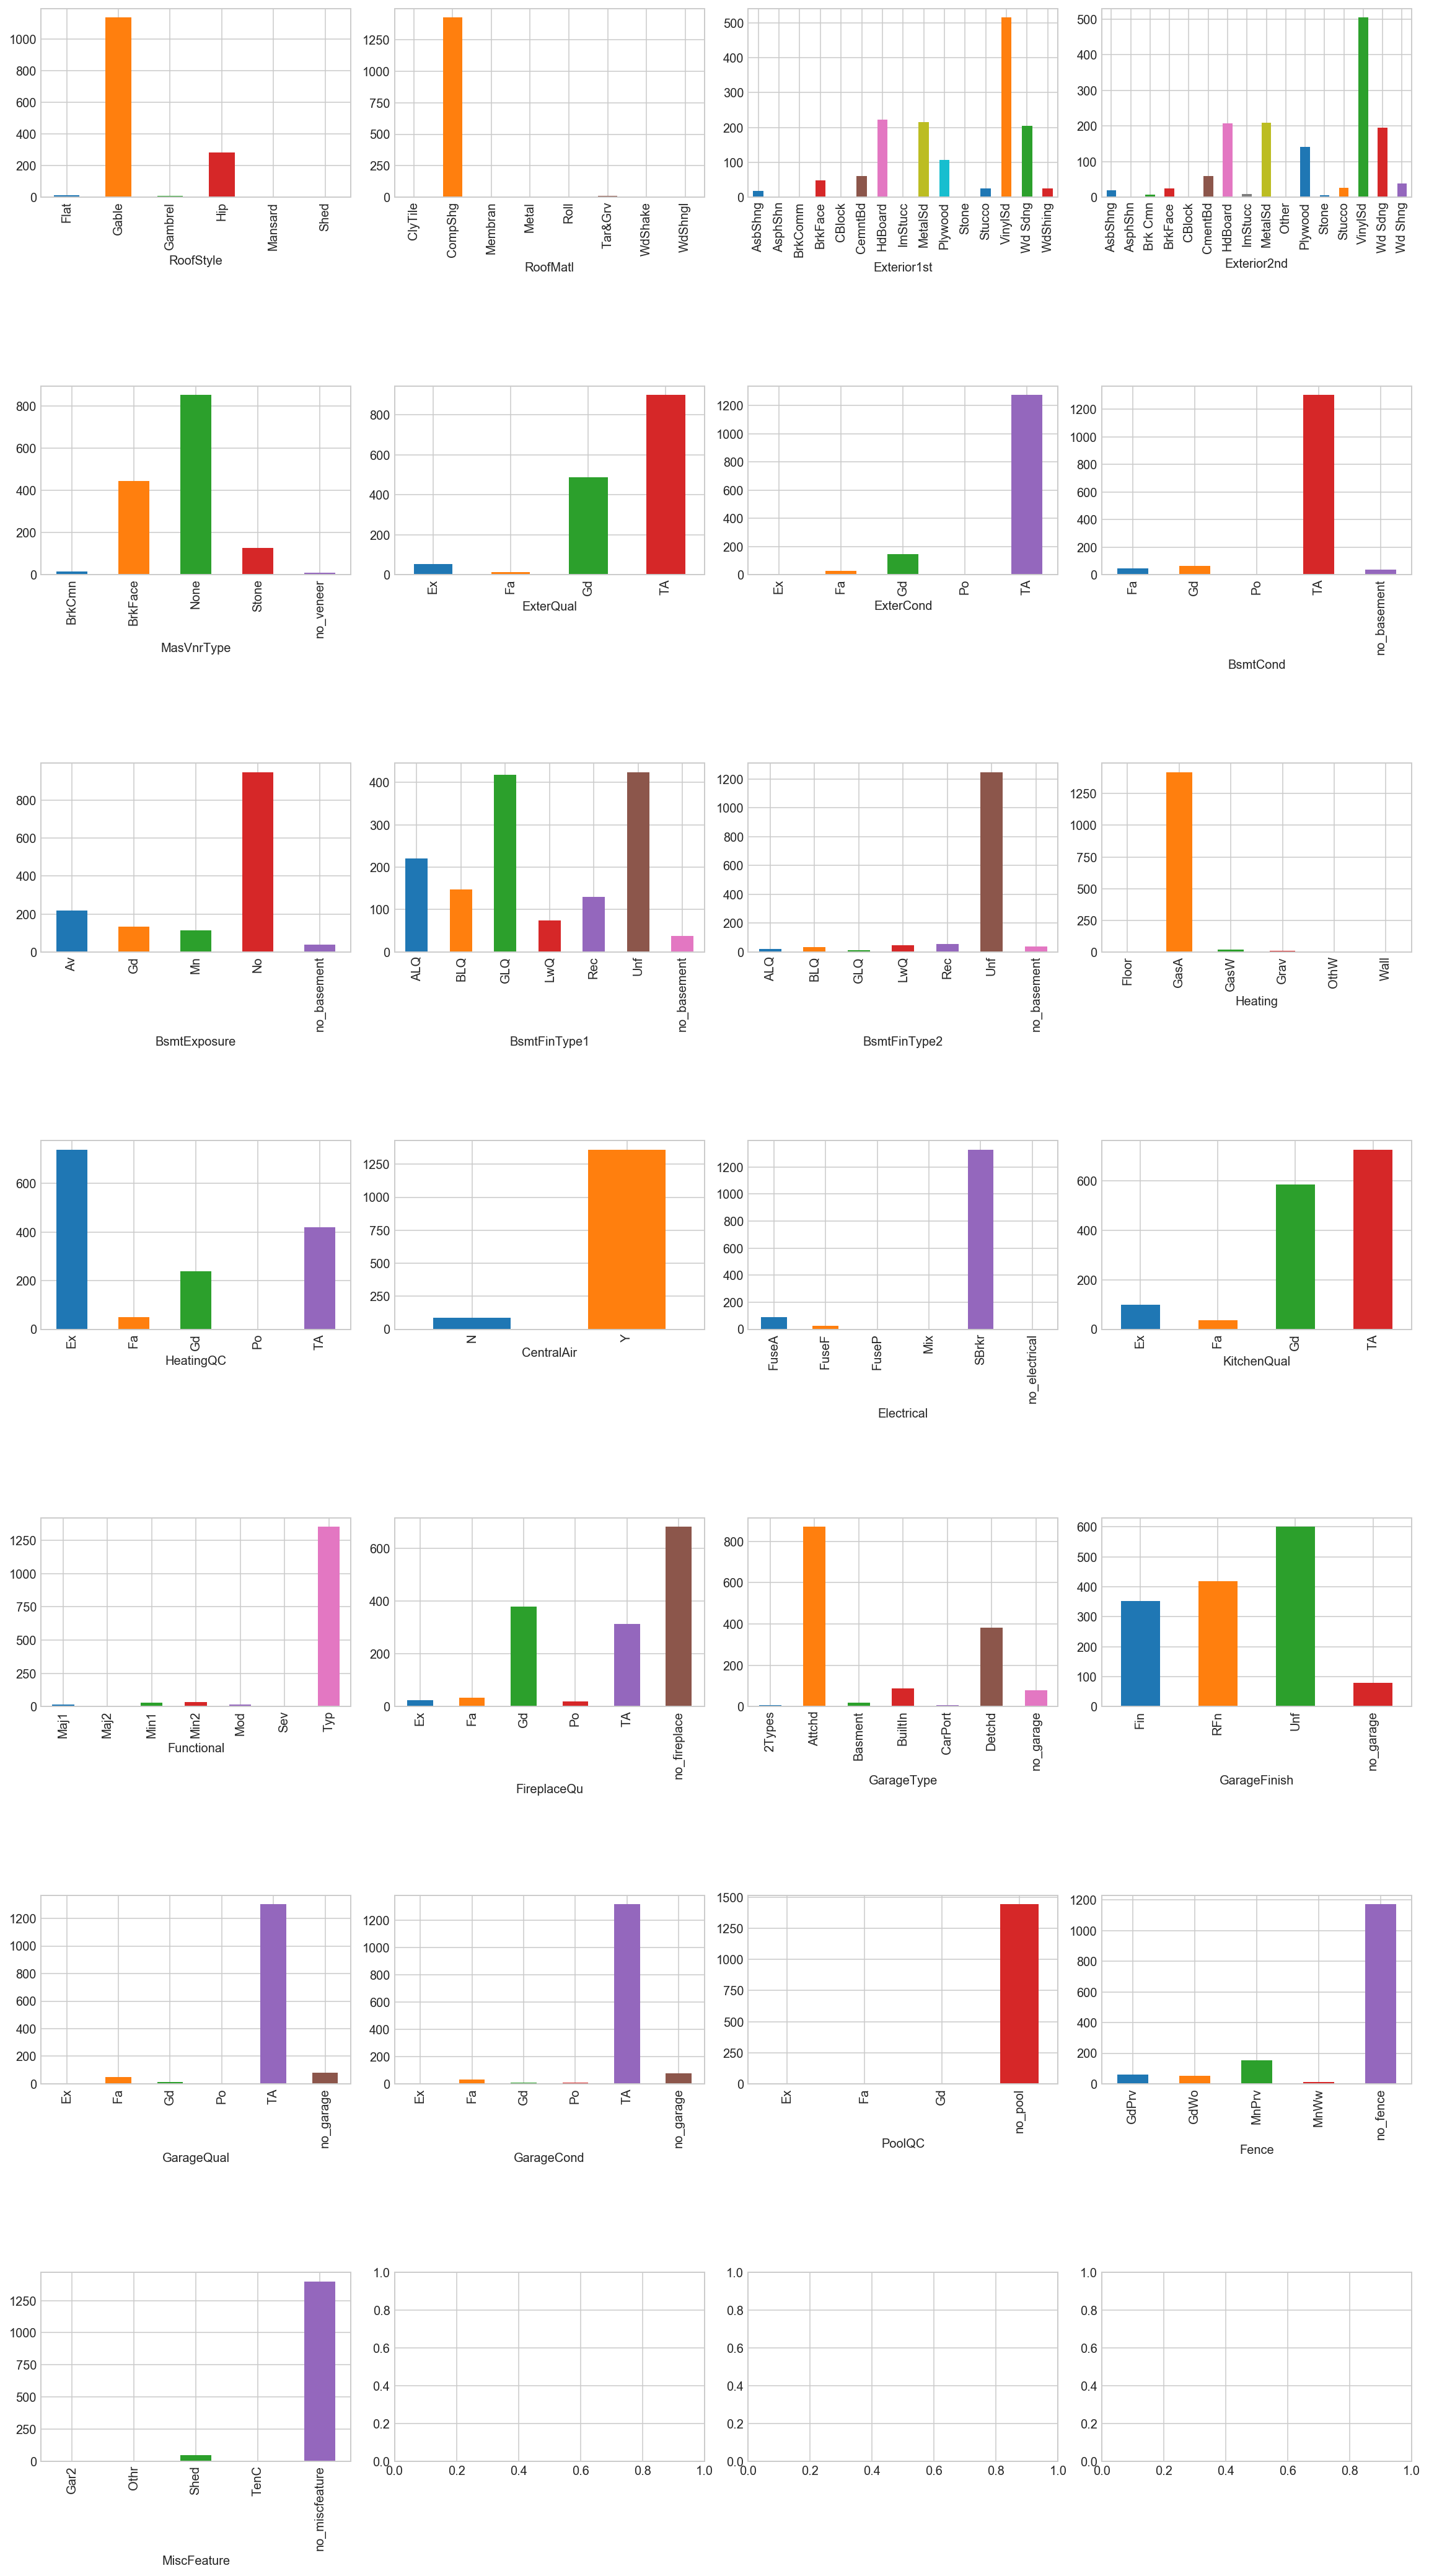

In [147]:
# Obtaining all the columns from house_train_obj
reno_house_obj_col = reno_house_obj.columns

# Passing in the list of column names into our bar_graph function
# Bar charts of house_train_obj
bar_graph(*reno_house_obj_col)

#### Discovery

'RoofMatl', 'BsmtCond', 'Heating', 'Electrical', 'CentralAir', 'Functional', 'GarageQual', 'GarageCond', 'PoolQC', 'MiscFeature' are mostly dominated by one category (>=90%).

They will be dropped to simplify our machine learning model.

In [149]:
# Dropping the 'RoofMatl', 'BsmtCond', 'Heating', 'Electrical', 'CentralAir', 'Functional', 
# 'GarageQual', 'GarageCond', 'PoolQC', 'MiscFeature' columns from reno_house_obj

reno_house_obj.drop(['RoofMatl', 'BsmtCond', 'Heating', 'Electrical', 
                'CentralAir', 'Functional', 'GarageQual', 'GarageCond', 'PoolQC', 'MiscFeature' ], axis=1, inplace = True)

C:\Users\dsiow\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [151]:
reno_house_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 15 columns):
RoofStyle       1450 non-null object
Exterior1st     1450 non-null object
Exterior2nd     1450 non-null object
MasVnrType      1450 non-null object
ExterQual       1450 non-null object
ExterCond       1450 non-null object
BsmtExposure    1450 non-null object
BsmtFinType1    1450 non-null object
BsmtFinType2    1450 non-null object
HeatingQC       1450 non-null object
KitchenQual     1450 non-null object
FireplaceQu     1450 non-null object
GarageType      1450 non-null object
GarageFinish    1450 non-null object
Fence           1450 non-null object
dtypes: object(15)
memory usage: 170.0+ KB


## Dummy-coding reno_house_obj

In [152]:
# Obtain a list of columns that you want to dummy-code

col_list = reno_house_obj.columns.tolist()

print(col_list)

['RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence']


In [155]:
reno_house_obj_dummy = pd.DataFrame()

for col in col_list:
    # Dummy-coding each column, then dropping the first column
    temp = pd.get_dummies(reno_house_obj[col], prefix = col, drop_first=True)
    
    # Concatenating the dummy columns together
    reno_house_obj_dummy = pd.concat([reno_house_obj_dummy, temp], axis = 1)

In [156]:
reno_house_obj_dummy

RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                   1                  0              0                  0   
1                   1                  0              0                  0   
2                   1                  0              0                  0   
3                   1                  0              0                  0   
4                   1                  0              0                  0   
5                   1                  0              0                  0   
6                   1                  0              0                  0   
7                   1                  0              0                  0   
8                   1                  0              0                  0   
9                   1                  0              0                  0   
10                  0                  0              1                  0   
11                  0                  0              1                  0   
12                  0                  0              1                  0   
13                  1                  0              0                  0   
14                  0                  0              1                  0   
15                  1                  0              0                  0   
16                  1                  0              0                  0   
17                  1                  0              0                  0   
18                  1                  0              0                  0   
19                  0                  0              1                  0   
20                  1                  0              0                  0   
21                  1                  0              0                  0   
22                  0                  0              1                  0   
23                  1                  0              0                  0   
24                  1                  0              0                  0   
25                  1                  0              0                  0   
26                  1                  0              0                  0   
27                  1                  0              0                  0   
28                  1                  0              0                  0   
29                  1                  0              0                  0   
30                  1                  0              0                  0   
31                  1                  0              0                  0   
32                  0                  0              1                  0   
33                  0                  0              1                  0   
34                  1                  0              0                  0   
35                  1                  0              0                  0   
36                  0                  0              1                  0   
37                  1                  0              0                  0   
38                  1                  0              0                  0   
39                  1                  0              0                  0   
40                  1                  0              0                  0   
41                  1                  0              0                  0   
42                  0                  0              1                  0   
43                  1                  0              0                  0   
44                  0                  0              1                  0   
45                  1                  0              0                  0   
46                  1                  0              0                  0   
47                  1                  0              0                  0   
48                  1                  0              0                  0   
49                  1                  0              0                  0   
...               ...       

## Concatenating reno_house_num_clean and reno_house_obj_dummy to get X_reno

In [179]:
X_reno = pd.concat([reno_house_num_clean, reno_house_obj_dummy], axis=1)

X_reno = X_reno.loc[X_reno[X_reno['YrSold'] < 2010].index,:]

X_reno_train.drop(labels = ['YrSold'], axis = 1, inplace = True)

# Generate the residuals of the training set in previous question

In [166]:
# Create a new column called 'SalePrice_pred' in y_train
y_train['SalePrice_pred'] = optimal_lasso.predict(X_train)

In [167]:
# Create a new column that contains the residuals (y_train['SalePrice_pred'] - y_train['SalePrice'])
y_train['residual'] = y_train['SalePrice_pred'] - y_train['SalePrice']

## y_train['residual'] is assigned to y_reno

All values in y_reno refer to values before 2010

In [178]:
y_reno = y_train['residual']

In [183]:
# Confirming that there are no null values in X_reno

X_reno.isnull().sum()

BsmtUnfSF                   0
BsmtFullBath                0
BsmtHalfBath                0
Fireplaces                  0
HalfBath                    0
MiscVal                     0
FullBath                    0
GarageCars                  0
OverallCond                 0
OverallQual                 0
TotRmsAbvGrd                0
YrSold                      0
RoofStyle_Gable             0
RoofStyle_Gambrel           0
RoofStyle_Hip               0
RoofStyle_Mansard           0
RoofStyle_Shed              0
Exterior1st_AsphShn         0
Exterior1st_BrkComm         0
Exterior1st_BrkFace         0
Exterior1st_CBlock          0
Exterior1st_CemntBd         0
Exterior1st_HdBoard         0
Exterior1st_ImStucc         0
Exterior1st_MetalSd         0
Exterior1st_Plywood         0
Exterior1st_Stone           0
Exterior1st_Stucco          0
Exterior1st_VinylSd         0
Exterior1st_Wd Sdng         0
Exterior1st_WdShing         0
Exterior2nd_AsphShn         0
Exterior2nd_Brk Cmn         0
Exterior2n

# Training linear regression model for X_reno and y_reno

In [184]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_reno,y_reno)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [188]:
# Printing out the coefficients

for f, coeff in zip(X_reno.columns,linear_model.coef_):
    print(f,coeff)

BsmtUnfSF -21.960739469221345
BsmtFullBath -363.3333127439224
BsmtHalfBath -78.21626024229545
Fireplaces -13007.721121059381
HalfBath -480.24998759193113
MiscVal 69.03698662638203
FullBath -1187.610954233427
GarageCars -5210.2704846444085
OverallCond -8532.262607122593
OverallQual -5348.792403247642
TotRmsAbvGrd 4035.681892064042
YrSold 1511.0028639506163
RoofStyle_Gable -14444.573728348943
RoofStyle_Gambrel -19470.731993733778
RoofStyle_Hip -13144.507606565348
RoofStyle_Mansard -20899.95508756324
RoofStyle_Shed -21461.12021715023
Exterior1st_AsphShn 3.038597127611953e+17
Exterior1st_BrkComm 16305.736306713894
Exterior1st_BrkFace -22299.67825330334
Exterior1st_CBlock 1.0214533264128102e+17
Exterior1st_CemntBd 8300.548830982023
Exterior1st_HdBoard -13708.660748830593
Exterior1st_ImStucc 59171.769604652516
Exterior1st_MetalSd -5787.007819971217
Exterior1st_Plywood -7760.885584410192
Exterior1st_Stone -16525.059179698732
Exterior1st_Stucco -2621.9153540067587
Exterior1st_VinylSd 2973.7061

In [189]:
# Printing out the intercept
print(linear_model.intercept_)

-3040827.609375


In [191]:
# Printing out the score on training set
print(linear_model.score(X_reno, y_reno))

0.2274494381220072


### Calculate RMSE

In [192]:
# Predicting the SalePrice of training set
residual_pred = linear_model.predict(X_reno)

In [193]:
# Calculating RMSE:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_reno, residual_pred))

29226.232868563253

# Performing cross-validation
Performing cross-validation to see how well the linear model holds for different folds of the training data

In [194]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

# Perform cross-validation with a five-fold split.
scores = cross_val_score(linear_model, X_train, y_train, cv=10)

print(scores)
print(np.mean(scores), np.std(scores))

[ 8.80088156e-01  7.70534372e-01  8.33112166e-01 -1.54884108e+13
  7.79121368e-01 -1.39372267e+22  8.36454778e-01  7.60467924e-01
  6.94630572e-01  8.16358150e-01]
-1.39372267512005e+21 4.181168020197347e+21


It appears that the model doesn't perform well for all segments of the training data. Thus, we'll proceed to use lasso linear regression to remove coefficients to improve our model.

# Lasso Linear Regression Modelling
## Getting optimum alpha value for lasso

In [195]:
from sklearn.linear_model import LassoCV

optimal_lasso = LassoCV(n_alphas=100, cv=10, verbose=1)
optimal_lasso.fit(X_reno, np.ravel(y_reno))

print(optimal_lasso.alpha_)

..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

222.52189944641978


......................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished


## Training the lasso linear regression model

In [196]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_reno, y_reno, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores), np.std(lasso_scores))

[ 0.02342309  0.26530911  0.24624334  0.07167919  0.16508407  0.13260587
 -0.09761988  0.2239329   0.11518952  0.06535006]
0.1211197261114266 0.10585994277051042


## Examining the coefficients of lasso linear regression model

In [198]:
lasso_coefs = pd.DataFrame(optimal_lasso.coef_.reshape(-1,1), index=X_reno.columns, columns=['coef'])

lasso_coefs.sort_values(by='coef')

coef
Exterior1st_BrkFace      -14896.824137
BsmtExposure_Gd          -12070.185025
OverallCond               -8223.196376
OverallQual               -6653.208404
GarageType_no_garage      -4339.451291
GarageCars                -3378.668029
MasVnrType_None           -2732.558214
FireplaceQu_no_fireplace  -1443.127197
Exterior2nd_VinylSd        -676.753766
BsmtFinType1_Unf           -626.133399
GarageFinish_no_garage     -395.802016
FullBath                   -314.862385
HalfBath                   -146.352272
BsmtFinType1_Rec              0.000000
BsmtFinType1_GLQ              0.000000
BsmtFinType1_BLQ             -0.000000
BsmtFinType1_no_basement     -0.000000
BsmtExposure_no_basement     -0.000000
ExterCond_Po                  0.000000
ExterCond_TA                 -0.000000
BsmtFinType2_BLQ              0.000000
ExterCond_Fa                  0.000000
ExterQual_Gd                  0.000000
ExterQual_Fa                 -0.000000
MasVnrType_no_veneer         -0.000000
BsmtExposure_Mn               0.000000
BsmtFinType2_GLQ             -0.000000
BsmtUnfSF                     0.000000
BsmtFinType2_Rec              0.000000
Fence_MnPrv                  -0.000000
Fence_GdWo                   -0.000000
GarageFinish_Unf              0.000000
GarageType_Detchd            -0.000000
GarageType_CarPort            0.000000
GarageType_BuiltIn           -0.000000
GarageType_Basment            0.000000
BsmtFinType2_LwQ              0.000000
FireplaceQu_TA                0.000000
FireplaceQu_Gd                0.000000
FireplaceQu_Fa                0.000000
KitchenQual_Fa                0.000000
HeatingQC_TA                  0.000000
Fence_MnWw                    0.000000
HeatingQC_Fa                  0.000000
BsmtFinType2_no_basement     -0.000000
FireplaceQu_Po               -0.000000
HeatingQC_Po                 -0.000000
MasVnrType_Stone              0.000000
Exterior2nd_Wd Shng           0.000000
MasVnrType_BrkFace            0.000000
Exterior1st_MetalSd           0.000000
Exterior1st_ImStucc           0.000000
Exterior1st_HdBoard           0.000000
Exterior1st_CemntBd          -0.000000
Exterior1st_CBlock            0.000000
Exterior1st_BrkComm           0.000000
Exterior1st_AsphShn           0.000000
RoofStyle_Shed               -0.000000
RoofStyle_Mansard            -0.000000
RoofStyle_Hip                 0.000000
RoofStyle_Gambrel            -0.000000
RoofStyle_Gable              -0.000000
MiscVal                       0.000000
Fireplaces                    0.000000
BsmtHalfBath                  0.000000
BsmtFullBath                 -0.000000
Exterior1st_Stone             0.000000
Exterior1st_Stucco            0.000000
Exterior1st_Plywood           0.000000
Exterior1st_Wd Sdng           0.000000
Exterior2nd_Wd Sdng          -0.000000
Exterior2nd_Stucco            0.000000
Exterior2nd_Stone             0.000000
Exterior2nd_Other             0.000000
Exterior2nd_MetalSd           0.000000
Exterior1st_VinylSd          -0.000000
Exterior2nd_CmentBd          -0.000000
Exterior2nd_ImStucc          -0.000000
Fence_no_fence                0.000000
Exterior1st_WdShing          -0.000000
Exterior2nd_BrkFace          -0.000000
Exterior2nd_AsphShn          -0.000000
Exterior2nd_CBlock            0.000000
Exterior2nd_Brk Cmn          -0.000000
BsmtFinType2_Unf            102.960362
ExterCond_Gd                185.760335
YrSold                      812.019922
Exterior2nd_HdBoard         852.995773
ExterQual_TA               1339.466956
HeatingQC_Gd               1641.678395
Exterior2nd_Plywood        2083.980432
TotRmsAbvGrd               2731.045195
BsmtExposure_No            3007.380239
GarageType_Attchd          3442.593940
GarageFinish_RFn           3906.733999
BsmtFinType1_LwQ           4291.919449
KitchenQual_TA             7599.019698
KitchenQual_Gd             8519.953086

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
# A: